# Market Basket Analysis


In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


**What is Market Basket Analysis ?**

Market Basket Analysis is one of the key techniques used by large retailers to uncover associations between items. 
It works by looking for combinations of items that occur together frequently in transactions. To put it another way, it allows retailers to identify relationships between the items that people buy.

# Market Basket Analysis For Foodmart Store Dataset

**About Foodmart**

![o.jpg](attachment:o.jpg)

Food Mart (FM) is a chain of convenience stores in the United States. The private company's headquarters are located in Mentor, Ohio, and there are currently approximately **325 stores located in the US**. Food Mart operates on the franchise system.

**Importing Libraries**

In [ ]:
import pandas as pd 
import numpy as np 
import matplotlib.pyplot as plt 

In [ ]:
## Get multiple outputs in the same cell
from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = "all"

## Ignore all warnings
import warnings
warnings.filterwarnings('ignore')
warnings.filterwarnings(action='ignore', category=DeprecationWarning)

In [ ]:
## Display all rows and columns of a dataframe instead of a truncated version
from IPython.display import display
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)

**Loading Customers Dataset**

In [ ]:
customer=pd.read_csv("/content/drive/MyDrive/A Apriori project/customer.csv")

In [ ]:
customer.head()

customer_id      city state_province country  customer_region_id  \
0            1  Tlaxiaco         Oaxaca  Mexico                  30   
1            2     Sooke             BC  Canada                 101   
2            3  Issaquah             WA     USA                  21   
3            4   Burnaby             BC  Canada                  92   
4            5    Novato             CA     USA                  42   

  yearly_income gender  total_children  num_children_at_home  \
0   $30K - $50K      F               4                     2   
1   $70K - $90K      M               1                     0   
2   $50K - $70K      F               1                     1   
3   $10K - $30K      M               4                     4   
4   $30K - $50K      F               3                     0   

             education date_accnt_opened member_card      occupation  \
0  Partial High School          10/09/91      Bronze  Skilled Manual   
1  Partial High School          11/03/93      Bronze    Professional   
2     Bachelors Degree          11/06/91      Bronze    Professional   
3  Partial High School          21/05/94      Normal  Skilled Manual   
4      Partial College          21/08/92      Silver          Manual   

  houseowner  num_cars_owned  
0          Y               4  
1          N               3  
2          Y               2  
3          N               2  
4          N               3

**Loading Products Dataset**

In [ ]:
product=pd.read_csv("/content/drive/MyDrive/A Apriori project/product.csv")

In [ ]:
product.head()

product_class_id  product_id  brand_name                 product_name  \
0                30           1  Washington       Washington Berry Juice   
1                52           2  Washington       Washington Mango Drink   
2                52           3  Washington  Washington Strawberry Drink   
3                19           4  Washington        Washington Cream Soda   
4                19           5  Washington         Washington Diet Soda   

           SKU   SRP  gross_weight  net_weight  recyclable_package  low_fat  \
0  90748583674  2.85          8.39        6.39                   0        0   
1  96516502499  0.74          7.42        4.42                   0        1   
2  58427771925  0.83         13.10       11.10                   1        1   
3  64412155747  3.64         10.60        9.60                   1        0   
4  85561191439  2.19          6.66        4.65                   1        0   

   units_per_case  cases_per_pallet  shelf_width  shelf_height  shelf_depth  
0              30                14         16.9         12.60         7.40  
1              18                 8         13.4          3.71        22.60  
2              17                13         14.4         11.00         7.77  
3              26                10         22.9         18.90         7.93  
4               7                10         20.7         21.90        19.20

**Loading Departments Dataset**

In [ ]:
product_class=pd.read_csv("/content/drive/MyDrive/A Apriori project/product_class.csv")

In [ ]:
product_class.head()

product_class_id   subcategory       category       department family
0                 1          Nuts      Specialty          Produce   Food
1                 2     Shellfish        Seafood          Seafood   Food
2                 3  Canned Fruit          Fruit  Canned Products   Food
3                 4        Spices   Baking Goods     Baking Goods   Food
4                 5         Pasta  Starchy Foods    Starchy Foods   Food

**Loading Region Dataset**

In [ ]:
region=pd.read_csv("/content/drive/MyDrive/A Apriori project/region.csv")

In [ ]:
region.head()

region_id     sales_city sales_state_province sales_district  \
0          0           None                 None    No District   
1          1  San Francisco                   CA  San Francisco   
2          2    Mexico City                   DF    Mexico City   
3          3    Los Angeles                   CA    Los Angeles   
4          4    Guadalajara              Jalisco    Guadalajara   

     sales_region sales_country  sales_district_id  
0       No Region    No Country                  0  
1    Central West           USA                123  
2  Mexico Central        Mexico                118  
3      South West           USA                116  
4     Mexico West        Mexico                114

**Loading Sales Dataset**

In [ ]:
df=pd.read_csv("/content/drive/MyDrive/A Apriori project/sales.csv")

In [ ]:
df.head()

product_id  time_id  customer_id  store_id  store_sales  store_cost  \
0         337      371         6280         2         1.50      0.5100   
1        1512      371         6280         2         1.62      0.6318   
2         963      371         4018         2         2.40      0.7200   
3         181      371         4018         2         2.79      1.0323   
4        1383      371         4018         2         5.18      2.1756   

   unit_sales  
0           2  
1           3  
2           1  
3           3  
4           2

**Loading Stores Dataset**

In [ ]:
store=pd.read_csv("/content/drive/MyDrive/A Apriori project/store.csv")

In [ ]:
store.head()

store_id           store_type  region_id store_name  store_number  \
0         0         HeadQuarters          0         HQ             0   
1         1          Supermarket         28    Store 1             1   
2         2        Small Grocery         78    Store 2             2   
3         3          Supermarket         76    Store 3             3   
4         4  Gourmet Supermarket         27    Store 4             4   

  store_street_address  store_city store_state  store_postal_code  \
0        1 Alameda Way     Alameda          CA              55555   
1       2853 Bailey Rd    Acapulco    Guerrero              55555   
2   5203 Catanzaro Way  Bellingham          WA              55555   
3   1501 Ramsey Circle   Bremerton          WA              55555   
4     433 St George Dr     Camacho   Zacatecas              55555   

  store_country store_manager   store_phone     store_fax first_opened_date  \
0           USA           Sam  178-555-8979  124-555-9116          ########   
1        Mexico         Jones  262-555-5124  262-555-5121     9/1/1982 0:00   
2           USA         Smith  605-555-8203  605-555-8201     2/4/1970 0:00   
3           USA         Davis  509-555-1596  509-555-1591    14/6/1959 0:00   
4        Mexico       Johnson  304-555-1474  304-555-1471    27/9/1994 0:00   

  last_remodel_date  store_sqft  grocery_sqft  frozen_sqft  meat_sqft  \
0    4/12/1990 0:00       25638         18697         3648       3293   
1    5/12/1990 0:00       23593         17475         3671       2447   
2     4/6/1973 0:00       28206         22271         3561       2374   
3   19/11/1967 0:00       39696         24390         9184       6122   
4    1/12/1995 0:00       23759         16844         4149       2766   

   coffee_bar  video_store  salad_bar  prepared_food  florist  
0           0            0          0              0        0  
1           0            0          0              0        0  
2           1            0          0              0        0  
3           0            0          1              1        0  
4           1            0          1              1        1

**Loading Time by Day Dataset**

In [ ]:
time_by_day=pd.read_csv("/content/drive/MyDrive/A Apriori project/time_by_day.csv")

In [ ]:
time_by_day.head()

time_id    the_date    the_day  the_year  the_month  day_of_month  \
0        1  1996-01-01     Monday      1996          1             1   
1        2  1996-01-02    Tuesday      1996          1             2   
2        3  1996-01-03  Wednesday      1996          1             3   
3        4  1996-01-04   Thursday      1996          1             4   
4        5  1996-01-05     Friday      1996          1             5   

   day_since_epoch  
0            33603  
1            33604  
2            33605  
3            33606  
4            33607

In [ ]:
time_by_day.tail()

time_id    the_date    the_day  the_year  the_month  day_of_month  \
1456     1457  1999-12-27     Monday      1999         12            27   
1457     1458  1999-12-28    Tuesday      1999         12            28   
1458     1459  1999-12-29  Wednesday      1999         12            29   
1459     1460  1999-12-30   Thursday      1999         12            30   
1460     1461  1999-12-31     Friday      1999         12            31   

      day_since_epoch  
1456            35059  
1457            35060  
1458            35061  
1459            35062  
1460            35063

**Merging Customer Dataset in df Dataframe**

In [ ]:
df=df.merge(customer,on='customer_id')

In [ ]:
df.head()

product_id  time_id  customer_id  store_id  store_sales  store_cost  \
0         337      371         6280         2         1.50      0.5100   
1        1512      371         6280         2         1.62      0.6318   
2         963      371         4018         2         2.40      0.7200   
3         181      371         4018         2         2.79      1.0323   
4        1383      371         4018         2         5.18      2.1756   

   unit_sales           city state_province country  customer_region_id  \
0           2      Anacortes             WA     USA                  79   
1           3      Anacortes             WA     USA                  79   
2           1  Sedro Woolley             WA     USA                  80   
3           3  Sedro Woolley             WA     USA                  80   
4           2  Sedro Woolley             WA     USA                  80   

  yearly_income gender  total_children  num_children_at_home  \
0   $30K - $50K      F               5                     0   
1   $30K - $50K      F               5                     0   
2  $90K - $110K      F               4                     0   
3  $90K - $110K      F               4                     0   
4  $90K - $110K      F               4                     0   

             education date_accnt_opened member_card      occupation  \
0   High School Degree          14/01/93      Bronze  Skilled Manual   
1   High School Degree          14/01/93      Bronze  Skilled Manual   
2  Partial High School          07/05/92      Silver      Management   
3  Partial High School          07/05/92      Silver      Management   
4  Partial High School          07/05/92      Silver      Management   

  houseowner  num_cars_owned  
0          Y               3  
1          Y               3  
2          Y               2  
3          Y               2  
4          Y               2

**Merging Products Dataset in df Dataframe**

In [ ]:
df=df.merge(product,on='product_id')

In [ ]:
df.head()

product_id  time_id  customer_id  store_id  store_sales  store_cost  \
0         337      371         6280         2         1.50      0.5100   
1         337      987         5713         2         0.75      0.2775   
2         337      826         7413         3         2.25      1.1025   
3         337      765         1005         3         3.00      1.1400   
4         337      829         4998         3         2.25      1.1250   

   unit_sales          city state_province country  customer_region_id  \
0           2     Anacortes             WA     USA                  79   
1           1     Anacortes             WA     USA                  79   
2           3     Bremerton             WA     USA                  76   
3           4     Bremerton             WA     USA                  76   
4           3  Port Orchard             WA     USA                  77   

  yearly_income gender  total_children  num_children_at_home  \
0   $30K - $50K      F               5                     0   
1   $70K - $90K      M               3                     0   
2   $10K - $30K      F               3                     0   
3   $10K - $30K      M               2                     0   
4   $50K - $70K      M               3                     0   

             education date_accnt_opened member_card      occupation  \
0   High School Degree          14/01/93      Bronze  Skilled Manual   
1     Bachelors Degree          06/08/93      Bronze    Professional   
2  Partial High School          20/12/93      Normal          Manual   
3     Bachelors Degree          20/01/93      Normal      Management   
4     Bachelors Degree          04/06/92      Bronze    Professional   

  houseowner  num_cars_owned  product_class_id brand_name  \
0          Y               3                58     Better   
1          N               1                58     Better   
2          Y               1                58     Better   
3          Y               0                58     Better   
4          N               3                58     Better   

                product_name          SKU   SRP  gross_weight  net_weight  \
0  Better Turkey Noodle Soup  17979437708  0.75          8.34        7.34   
1  Better Turkey Noodle Soup  17979437708  0.75          8.34        7.34   
2  Better Turkey Noodle Soup  17979437708  0.75          8.34        7.34   
3  Better Turkey Noodle Soup  17979437708  0.75          8.34        7.34   
4  Better Turkey Noodle Soup  17979437708  0.75          8.34        7.34   

   recyclable_package  low_fat  units_per_case  cases_per_pallet  shelf_width  \
0                   1        1               9                10         18.4   
1                   1        1               9                10         18.4   
2                   1        1               9                10         18.4   
3                   1        1               9                10         18.4   
4                   1        1               9                10         18.4   

   shelf_height  shelf_depth  
0          21.6         4.76  
1          21.6         4.76  
2          21.6         4.76  
3          21.6         4.76  
4          21.6         4.76

**Merging Department Dataset in df Dataframe**

In [ ]:
df=df.merge(product_class,on='product_class_id')

In [ ]:
df.head()

product_id  time_id  customer_id  store_id  store_sales  store_cost  \
0         337      371         6280         2         1.50      0.5100   
1         337      987         5713         2         0.75      0.2775   
2         337      826         7413         3         2.25      1.1025   
3         337      765         1005         3         3.00      1.1400   
4         337      829         4998         3         2.25      1.1250   

   unit_sales          city state_province country  customer_region_id  \
0           2     Anacortes             WA     USA                  79   
1           1     Anacortes             WA     USA                  79   
2           3     Bremerton             WA     USA                  76   
3           4     Bremerton             WA     USA                  76   
4           3  Port Orchard             WA     USA                  77   

  yearly_income gender  total_children  num_children_at_home  \
0   $30K - $50K      F               5                     0   
1   $70K - $90K      M               3                     0   
2   $10K - $30K      F               3                     0   
3   $10K - $30K      M               2                     0   
4   $50K - $70K      M               3                     0   

             education date_accnt_opened member_card      occupation  \
0   High School Degree          14/01/93      Bronze  Skilled Manual   
1     Bachelors Degree          06/08/93      Bronze    Professional   
2  Partial High School          20/12/93      Normal          Manual   
3     Bachelors Degree          20/01/93      Normal      Management   
4     Bachelors Degree          04/06/92      Bronze    Professional   

  houseowner  num_cars_owned  product_class_id brand_name  \
0          Y               3                58     Better   
1          N               1                58     Better   
2          Y               1                58     Better   
3          Y               0                58     Better   
4          N               3                58     Better   

                product_name          SKU   SRP  gross_weight  net_weight  \
0  Better Turkey Noodle Soup  17979437708  0.75          8.34        7.34   
1  Better Turkey Noodle Soup  17979437708  0.75          8.34        7.34   
2  Better Turkey Noodle Soup  17979437708  0.75          8.34        7.34   
3  Better Turkey Noodle Soup  17979437708  0.75          8.34        7.34   
4  Better Turkey Noodle Soup  17979437708  0.75          8.34        7.34   

   recyclable_package  low_fat  units_per_case  cases_per_pallet  shelf_width  \
0                   1        1               9                10         18.4   
1                   1        1               9                10         18.4   
2                   1        1               9                10         18.4   
3                   1        1               9                10         18.4   
4                   1        1               9                10         18.4   

   shelf_height  shelf_depth subcategory     category    department family  
0          21.6         4.76        Soup  Canned Soup  Canned Foods   Food  
1          21.6         4.76        Soup  Canned Soup  Canned Foods   Food  
2          21.6         4.76        Soup  Canned Soup  Canned Foods   Food  
3          21.6         4.76        Soup  Canned Soup  Canned Foods   Food  
4          21.6         4.76        Soup  Canned Soup  Canned Foods   Food

**Merging Stores Dataset in df Dataframe**

In [ ]:
df=df.merge(store,on='store_id')

In [ ]:
df.head()

product_id  time_id  customer_id  store_id  store_sales  store_cost  \
0         337      371         6280         2         1.50      0.5100   
1         337      987         5713         2         0.75      0.2775   
2         337      742          307         2         2.25      0.7425   
3         963      371         4018         2         2.40      0.7200   
4         963      952         5121         2         2.40      1.1040   

   unit_sales           city state_province country  customer_region_id  \
0           2      Anacortes             WA     USA                  79   
1           1      Anacortes             WA     USA                  79   
2           3  Sedro Woolley             WA     USA                  80   
3           1  Sedro Woolley             WA     USA                  80   
4           1     Bellingham             WA     USA                  78   

   yearly_income gender  total_children  num_children_at_home  \
0    $30K - $50K      F               5                     0   
1    $70K - $90K      M               3                     0   
2  $130K - $150K      F               5                     0   
3   $90K - $110K      F               4                     0   
4    $30K - $50K      M               2                     0   

             education date_accnt_opened member_card      occupation  \
0   High School Degree          14/01/93      Bronze  Skilled Manual   
1     Bachelors Degree          06/08/93      Bronze    Professional   
2     Bachelors Degree          12/01/93      Bronze    Professional   
3  Partial High School          07/05/92      Silver      Management   
4      Partial College          12/04/93      Bronze        Clerical   

  houseowner  num_cars_owned  product_class_id  brand_name  \
0          Y               3                58      Better   
1          N               1                58      Better   
2          N               1                58      Better   
3          Y               2                58  Just Right   
4          Y               2                58  Just Right   

                     product_name          SKU   SRP  gross_weight  \
0       Better Turkey Noodle Soup  17979437708  0.75          8.34   
1       Better Turkey Noodle Soup  17979437708  0.75          8.34   
2       Better Turkey Noodle Soup  17979437708  0.75          8.34   
3  Just Right Chicken Noodle Soup  22934378981  2.40         20.50   
4  Just Right Chicken Noodle Soup  22934378981  2.40         20.50   

   net_weight  recyclable_package  low_fat  units_per_case  cases_per_pallet  \
0        7.34                   1        1               9                10   
1        7.34                   1        1               9                10   
2        7.34                   1        1               9                10   
3       18.50                   1        1               6                13   
4       18.50                   1        1               6                13   

   shelf_width  shelf_height  shelf_depth subcategory     category  \
0        18.40          21.6         4.76        Soup  Canned Soup   
1        18.40          21.6         4.76        Soup  Canned Soup   
2        18.40          21.6         4.76        Soup  Canned Soup   
3         6.68          10.6         9.16        Soup  Canned Soup   
4         6.68          10.6         9.16        Soup  Canned Soup   

     department family     store_type  region_id store_name  store_number  \
0  Canned Foods   Food  Small Grocery         78    Store 2             2   
1  Canned Foods   Food  Small Grocery         78    Store 2             2   
2  Canned Foods   Food  Small Grocery         78    Store 2             2   
3  Canned Foods   Food  Small Grocery         78    Store 2             2   
4  Canned Foods   Food  Small Grocery         78    Store 2             2   

  store_street_address  store_city store_state  store_postal_code  \
0   5203 Catanzaro Way  Bellingham          WA         

**Merging Region Dataset in df Dataframe**

In [ ]:
df=df.merge(region,on='region_id')

In [ ]:
df.head()

product_id  time_id  customer_id  store_id  store_sales  store_cost  \
0         337      371         6280         2         1.50      0.5100   
1         337      987         5713         2         0.75      0.2775   
2         337      742          307         2         2.25      0.7425   
3         963      371         4018         2         2.40      0.7200   
4         963      952         5121         2         2.40      1.1040   

   unit_sales           city state_province country  customer_region_id  \
0           2      Anacortes             WA     USA                  79   
1           1      Anacortes             WA     USA                  79   
2           3  Sedro Woolley             WA     USA                  80   
3           1  Sedro Woolley             WA     USA                  80   
4           1     Bellingham             WA     USA                  78   

   yearly_income gender  total_children  num_children_at_home  \
0    $30K - $50K      F               5                     0   
1    $70K - $90K      M               3                     0   
2  $130K - $150K      F               5                     0   
3   $90K - $110K      F               4                     0   
4    $30K - $50K      M               2                     0   

             education date_accnt_opened member_card      occupation  \
0   High School Degree          14/01/93      Bronze  Skilled Manual   
1     Bachelors Degree          06/08/93      Bronze    Professional   
2     Bachelors Degree          12/01/93      Bronze    Professional   
3  Partial High School          07/05/92      Silver      Management   
4      Partial College          12/04/93      Bronze        Clerical   

  houseowner  num_cars_owned  product_class_id  brand_name  \
0          Y               3                58      Better   
1          N               1                58      Better   
2          N               1                58      Better   
3          Y               2                58  Just Right   
4          Y               2                58  Just Right   

                     product_name          SKU   SRP  gross_weight  \
0       Better Turkey Noodle Soup  17979437708  0.75          8.34   
1       Better Turkey Noodle Soup  17979437708  0.75          8.34   
2       Better Turkey Noodle Soup  17979437708  0.75          8.34   
3  Just Right Chicken Noodle Soup  22934378981  2.40         20.50   
4  Just Right Chicken Noodle Soup  22934378981  2.40         20.50   

   net_weight  recyclable_package  low_fat  units_per_case  cases_per_pallet  \
0        7.34                   1        1               9                10   
1        7.34                   1        1               9                10   
2        7.34                   1        1               9                10   
3       18.50                   1        1               6                13   
4       18.50                   1        1               6                13   

   shelf_width  shelf_height  shelf_depth subcategory     category  \
0        18.40          21.6         4.76        Soup  Canned Soup   
1        18.40          21.6         4.76        Soup  Canned Soup   
2        18.40          21.6         4.76        Soup  Canned Soup   
3         6.68          10.6         9.16        Soup  Canned Soup   
4         6.68          10.6         9.16        Soup  Canned Soup   

     department family     store_type  region_id store_name  store_number  \
0  Canned Foods   Food  Small Grocery         78    Store 2             2   
1  Canned Foods   Food  Small Grocery         78    Store 2             2   
2  Canned Foods   Food  Small Grocery         78    Store 2             2   
3  Canned Foods   Food  Small Grocery         78    Store 2             2   
4  Canned Foods   Food  Small Grocery         78    Store 2             2   

  store_street_address  store_city store_state  store_postal_code  \
0   5203 Catanzaro Way  Bellingham          WA         

**Merging Time by Day Dataset in df Dataframe**

In [ ]:
df=df.merge(time_by_day,on='time_id')

In [ ]:
df.head()

product_id  time_id  customer_id  store_id  store_sales  store_cost  \
0         337      371         6280         2         1.50      0.5100   
1         963      371         4018         2         2.40      0.7200   
2        1512      371         6280         2         1.62      0.6318   
3         181      371         4018         2         2.79      1.0323   
4         483      371         4382         2         3.88      1.7072   

   unit_sales           city state_province country  customer_region_id  \
0           2      Anacortes             WA     USA                  79   
1           1  Sedro Woolley             WA     USA                  80   
2           3      Anacortes             WA     USA                  79   
3           3  Sedro Woolley             WA     USA                  80   
4           2      Anacortes             WA     USA                  79   

   yearly_income gender  total_children  num_children_at_home  \
0    $30K - $50K      F               5                     0   
1   $90K - $110K      F               4                     0   
2    $30K - $50K      F               5                     0   
3   $90K - $110K      F               4                     0   
4  $130K - $150K      F               0                     0   

             education date_accnt_opened member_card      occupation  \
0   High School Degree          14/01/93      Bronze  Skilled Manual   
1  Partial High School          07/05/92      Silver      Management   
2   High School Degree          14/01/93      Bronze  Skilled Manual   
3  Partial High School          07/05/92      Silver      Management   
4      Graduate Degree          25/07/92      Silver      Management   

  houseowner  num_cars_owned  product_class_id  brand_name  \
0          Y               3                58      Better   
1          Y               2                58  Just Right   
2          Y               3                 5      Jardon   
3          Y               2                61    High Top   
4          N               2                61   Tell Tale   

                     product_name          SKU   SRP  gross_weight  \
0       Better Turkey Noodle Soup  17979437708  0.75          8.34   
1  Just Right Chicken Noodle Soup  22934378981  2.40         20.50   
2                Jardon Spaghetti  53042894005  0.54         13.70   
3                High Top Lettuce  79397689700  0.93         16.10   
4       Tell Tale Corn on the Cob  80806578993  1.94         13.00   

   net_weight  recyclable_package  low_fat  units_per_case  cases_per_pallet  \
0        7.34                   1        1               9                10   
1       18.50                   1        1               6                13   
2       10.60                   1        0              28                13   
3       14.10                   0        1              23                 5   
4       10.00                   1        0               3                10   

   shelf_width  shelf_height  shelf_depth       subcategory       category  \
0        18.40          21.6         4.76              Soup    Canned Soup   
1         6.68          10.6         9.16              Soup    Canned Soup   
2        12.80          12.6         9.81             Pasta  Starchy Foods   
3        16.10          15.1        14.50  Fresh Vegetables     Vegetables   
4        20.80          21.6         5.86  Fresh Vegetables     Vegetables   

      department family     store_type  region_id store_name  store_number  \
0   Canned Foods   Food  Small Grocery         78    Store 2             2   
1   Canned Foods   Food  Small Grocery         78    Store 2             2   
2  Starchy Foods   Food  Small Grocery         78    Store 2             2   
3        Produce   Food  Small Grocery         78    Store 2             2   
4        Produce   Food  Small Grocery         78    Store 2             2   

  store_street_address  store_city store_state  store_postal_code  \
0

# Exploratory Data Analysis (EDA)

**Importing Libraries**

In [ ]:
!pip install squarify

In [ ]:
!pip install gapminder

In [ ]:
import pandas as pd 
import numpy as np 
import matplotlib.pyplot as plt 
import seaborn as sns 
import squarify
import networkx as nx
import warnings
import matplotlib as mpl
import gapminder as gapminder


%matplotlib inline

from mlxtend.frequent_patterns import apriori
from mlxtend.frequent_patterns import association_rules

**Loading Foodmart Offline Dataset**

In [ ]:
df=pd.read_csv("/content/drive/MyDrive/A Apriori project/Foodmart_dataset.csv")

**Size of Foodmart Dataset**

In [ ]:
df.shape

(269720, 75)

In [ ]:
df.head()

Unnamed: 0  product_id  time_id  customer_id  store_id  store_sales  \
0           0         337      371         6280         2         1.50   
1           1         963      371         4018         2         2.40   
2           2        1512      371         6280         2         1.62   
3           3         181      371         4018         2         2.79   
4           4         483      371         4382         2         3.88   

   store_cost  unit_sales           city state_province country  \
0      0.5100           2      Anacortes             WA     USA   
1      0.7200           1  Sedro Woolley             WA     USA   
2      0.6318           3      Anacortes             WA     USA   
3      1.0323           3  Sedro Woolley             WA     USA   
4      1.7072           2      Anacortes             WA     USA   

   customer_region_id  yearly_income gender  total_children  \
0                  79    $30K - $50K      F               5   
1                  80   $90K - $110K      F               4   
2                  79    $30K - $50K      F               5   
3                  80   $90K - $110K      F               4   
4                  79  $130K - $150K      F               0   

   num_children_at_home            education date_accnt_opened member_card  \
0                     0   High School Degree          14/01/93      Bronze   
1                     0  Partial High School          07/05/92      Silver   
2                     0   High School Degree          14/01/93      Bronze   
3                     0  Partial High School          07/05/92      Silver   
4                     0      Graduate Degree          25/07/92      Silver   

       occupation houseowner  num_cars_owned  product_class_id  brand_name  \
0  Skilled Manual          Y               3                58      Better   
1      Management          Y               2                58  Just Right   
2  Skilled Manual          Y               3                 5      Jardon   
3      Management          Y               2                61    High Top   
4      Management          N               2                61   Tell Tale   

                     product_name          SKU   SRP  gross_weight  \
0       Better Turkey Noodle Soup  17979437708  0.75          8.34   
1  Just Right Chicken Noodle Soup  22934378981  2.40         20.50   
2                Jardon Spaghetti  53042894005  0.54         13.70   
3                High Top Lettuce  79397689700  0.93         16.10   
4       Tell Tale Corn on the Cob  80806578993  1.94         13.00   

   net_weight  recyclable_package  low_fat  units_per_case  cases_per_pallet  \
0        7.34                   1        1               9                10   
1       18.50                   1        1               6                13   
2       10.60                   1        0              28                13   
3       14.10                   0        1              23                 5   
4       10.00                   1        0               3                10   

   shelf_width  shelf_height  shelf_depth       subcategory       category  \
0        18.40          21.6         4.76              Soup    Canned Soup   
1         6.68          10.6         9.16              Soup    Canned Soup   
2        12.80          12.6         9.81             Pasta  Starchy Foods   
3        16.10          15.1        14.50  Fresh Vegetables     Vegetables   
4        20.80          21.6         5.86  Fresh Vegetables     Vegetables   

      department family     store_type  region_id store_name  store_number  \
0   Canned Foods   Food  Small Grocery         78    Store 2             2   
1   Canned Foods   Food  Small Grocery         78    Store 2             2   
2  Starchy Foods   Food  Small Grocery         78    Store 2             2   
3        Produce   Food  Small Grocery         78    Store 2             2   
4        Produce   Food  Small Grocery         78    Store 2             2   

# Data Exploration

**Describe**

In [ ]:
df.describe()

Unnamed: 0     product_id        time_id    customer_id  \
count  269720.00000  269720.000000  269720.000000  269720.000000   
mean   134859.50000     783.862873     800.004990    5119.390405   
std     77861.60164     447.926131     201.955563    2901.883077   
min         0.00000       1.000000     367.000000       3.000000   
25%     67429.75000     396.000000     657.000000    2570.000000   
50%    134859.50000     787.000000     830.000000    5090.000000   
75%    202289.25000    1174.000000     968.000000    7614.000000   
max    269719.00000    1559.000000    1095.000000   10281.000000   

            store_id    store_sales     store_cost     unit_sales  \
count  269720.000000  269720.000000  269720.000000  269720.000000   
mean       12.753730       6.542142       2.618622       3.090201   
std         6.349746       3.461318       1.452805       0.835554   
min         1.000000       0.500000       0.153000       1.000000   
25%         7.000000       3.810000       1.498000       3.000000   
50%        13.000000       5.940000       2.386500       3.000000   
75%        17.000000       8.670000       3.486000       4.000000   
max        24.000000      23.640000      10.290000       6.000000   

       customer_region_id  total_children  num_children_at_home  \
count       269720.000000   269720.000000         269720.000000   
mean            57.723454        2.535351              0.816091   
std             29.973844        1.490679              1.292423   
min              1.000000        0.000000              0.000000   
25%             26.000000        1.000000              0.000000   
50%             66.000000        3.000000              0.000000   
75%             85.000000        4.000000              1.000000   
max            109.000000        5.000000              5.000000   

       num_cars_owned  product_class_id           SKU            SRP  \
count   269720.000000     269720.000000  2.697200e+05  269720.000000   
mean         2.205632         54.382471  5.563373e+10       2.117859   
std          1.111834         30.846176  2.580783e+10       0.930726   
min          0.000000          1.000000  1.003103e+10       0.500000   
25%          1.000000         30.000000  3.341941e+10       1.420000   
50%          2.000000         58.000000  5.639667e+10       2.130000   
75%          3.000000         79.000000  7.797237e+10       2.790000   
max          4.000000        110.000000  9.998368e+10       3.980000   

        gross_weight     net_weight  recyclable_package        low_fat  \
count  269720.000000  269720.000000       269720.000000  269720.000000   
mean       13.797998      11.786979            0.560911       0.353956   
std         4.623687       4.684530            0.496277       0.478197   
min         6.000000       3.050000            0.000000       0.000000   
25%         9.670000       7.710000            0.000000       0.000000   
50%        13.600000      11.600000            1.000000       0.000000   
75%        17.700000      16.000000            1.000000       1.000000   
max        21.900000      20.800000            1.000000       1.000000   

       units_per_case  cases_per_pallet    shelf_width   shelf_height  \
count   269720.000000     269720.000000  269720.000000  269720.000000   
mean        18.897490          9.469887      12.903214      12.938429   
std         10.244825          2.637010       5.759837       5.844580   
min          1.000000          5.000000       3.010000       3.000000   
25%         10.000000          7.000000       7.860000       7.880000   
50%         19.000000          9.000000      12.900000      12.800000   
75%         28.000000         12.000000      17.700000      18.200000   
max         36.000000         14.000000      22.900000      22.900000   

         shelf_depth      region_id   store_number  store_postal_code  \
count  269720.000000  269720.000000  269720.000000           269720.0   
mean       12.963582      39.894947      12.753730

In [ ]:
df.describe(include='all')

Unnamed: 0     product_id        time_id    customer_id  \
count   269720.00000  269720.000000  269720.000000  269720.000000   
unique           NaN            NaN            NaN            NaN   
top              NaN            NaN            NaN            NaN   
freq             NaN            NaN            NaN            NaN   
mean    134859.50000     783.862873     800.004990    5119.390405   
std      77861.60164     447.926131     201.955563    2901.883077   
min          0.00000       1.000000     367.000000       3.000000   
25%      67429.75000     396.000000     657.000000    2570.000000   
50%     134859.50000     787.000000     830.000000    5090.000000   
75%     202289.25000    1174.000000     968.000000    7614.000000   
max     269719.00000    1559.000000    1095.000000   10281.000000   

             store_id    store_sales     store_cost     unit_sales     city  \
count   269720.000000  269720.000000  269720.000000  269720.000000   269720   
unique            NaN            NaN            NaN            NaN      107   
top               NaN            NaN            NaN            NaN  Hidalgo   
freq              NaN            NaN            NaN            NaN    16684   
mean        12.753730       6.542142       2.618622       3.090201      NaN   
std          6.349746       3.461318       1.452805       0.835554      NaN   
min          1.000000       0.500000       0.153000       1.000000      NaN   
25%          7.000000       3.810000       1.498000       3.000000      NaN   
50%         13.000000       5.940000       2.386500       3.000000      NaN   
75%         17.000000       8.670000       3.486000       4.000000      NaN   
max         24.000000      23.640000      10.290000       6.000000      NaN   

       state_province country  customer_region_id yearly_income  gender  \
count          269720  269720       269720.000000        269720  269720   
unique             12       3                 NaN             8       2   
top                WA     USA                 NaN   $30K - $50K       F   
freq            86855  180823                 NaN         88422  136181   
mean              NaN     NaN           57.723454           NaN     NaN   
std               NaN     NaN           29.973844           NaN     NaN   
min               NaN     NaN            1.000000           NaN     NaN   
25%               NaN     NaN           26.000000           NaN     NaN   
50%               NaN     NaN           66.000000           NaN     NaN   
75%               NaN     NaN           85.000000           NaN     NaN   
max               NaN     NaN          109.000000           NaN     NaN   

        total_children  num_children_at_home            education  \
count    269720.000000         269720.000000               269720   
unique             NaN                   NaN                    5   
top                NaN                   NaN  Partial High School   
freq               NaN                   NaN                81536   
mean          2.535351              0.816091                  NaN   
std           1.490679              1.292423                  NaN   
min           0.000000              0.000000                  NaN   
25%           1.000000              0.000000                  NaN   
50%           3.000000              0.000000                  NaN   
75%           4.000000              1.000000                  NaN   
max           5.000000              5.000000                  NaN   

       date_accnt_opened member_card    occupation houseowner  num_cars_owned  \
count             269720      269720        269720     269720   269720.000000   
unique              1633           4             5          2             NaN   
top             16/10/93      Bronze  Professional          Y             NaN   
freq                 954      151261         87867     163137             NaN   
mean                 NaN         NaN           NaN        NaN        2.205632   
std             

**Missing Values**

In [ ]:
df.isnull().sum()

Unnamed: 0              0
product_id              0
time_id                 0
customer_id             0
store_id                0
store_sales             0
store_cost              0
unit_sales              0
city                    0
state_province          0
country                 0
customer_region_id      0
yearly_income           0
gender                  0
total_children          0
num_children_at_home    0
education               0
date_accnt_opened       0
member_card             0
occupation              0
houseowner              0
num_cars_owned          0
product_class_id        0
brand_name              0
product_name            0
SKU                     0
SRP                     0
gross_weight            0
net_weight              0
recyclable_package      0
low_fat                 0
units_per_case          0
cases_per_pallet        0
shelf_width             0
shelf_height            0
shelf_depth             0
subcategory             0
category                0
department  

**Datatypes**

In [ ]:
df.dtypes

Unnamed: 0                int64
product_id                int64
time_id                   int64
customer_id               int64
store_id                  int64
store_sales             float64
store_cost              float64
unit_sales                int64
city                     object
state_province           object
country                  object
customer_region_id        int64
yearly_income            object
gender                   object
total_children            int64
num_children_at_home      int64
education                object
date_accnt_opened        object
member_card              object
occupation               object
houseowner               object
num_cars_owned            int64
product_class_id          int64
brand_name               object
product_name             object
SKU                       int64
SRP                     float64
gross_weight            float64
net_weight              float64
recyclable_package        int64
low_fat                   int64
units_pe

**Checking Datatypes, Mising Value, Unique Value**

In [ ]:
temp = pd.DataFrame(index=df.columns)
temp['data_type']=df.dtypes
temp['null_count']=df.isnull().sum()
temp['unique_count']=df.nunique()

In [ ]:
temp

data_type  null_count  unique_count
Unnamed: 0               int64           0        269720
product_id               int64           0          1559
time_id                  int64           0           673
customer_id              int64           0          8842
store_id                 int64           0            24
store_sales            float64           0          1069
store_cost             float64           0         12535
unit_sales               int64           0             6
city                    object           0           107
state_province          object           0            12
country                 object           0             3
customer_region_id       int64           0           108
yearly_income           object           0             8
gender                  object           0             2
total_children           int64           0             6
num_children_at_home     int64           0             6
education               object           0             5
date_accnt_opened       object           0          1633
member_card             object           0             4
occupation              object           0             5
houseowner              object           0             2
num_cars_owned           int64           0             5
product_class_id         int64           0           102
brand_name              object           0           111
product_name            object           0          1559
SKU                      int64           0          1559
SRP                    float64           0           315
gross_weight           float64           0           376
net_weight             float64           0           332
recyclable_package       int64           0             2
low_fat                  int64           0             2
units_per_case           int64           0            36
cases_per_pallet         int64           0            10
shelf_width            float64           0           534
shelf_height           float64           0           524
shelf_depth            float64           0           488
subcategory             object           0           102
category                object           0            45
department              object           0            22
family                  object           0             3
store_type              object           0             5
region_id                int64           0            23
store_name              object           0            24
store_number             int64           0            24
store_street_address    object           0            24
store_city              object           0            23
store_state             object           0            10
store_postal_code        int64           0             1
store_country           object           0             3
store_manager           object           0            22
store_phone             object           0            24
store_fax               object           0            24
first_opened_date       object           0            24
last_remodel_date       object           0            24
store_sqft               int64           0            24
grocery_sqft             int64           0            24
frozen_sqft              int64           0            24
meat_sqft                int64           0            24
coffee_bar               int64           0             2
video_store              int64           0             2
salad_bar                int64           0             2
prepared_food            int64           0             2
florist                  int64           0             2
sales_city              object           0            23
sales_state_province    object           0            10
sales_district          object           0            21
sales_region            object           0             7
sales_country           object           0             3
sales_district_id        int64           0            21
the_date                object 

In [ ]:
del df['Unnamed: 0']

# Univariate Analysis 

**Histograms**

**Frequency Plot Of Department Id**

Text(0.5, 0, 'department id')

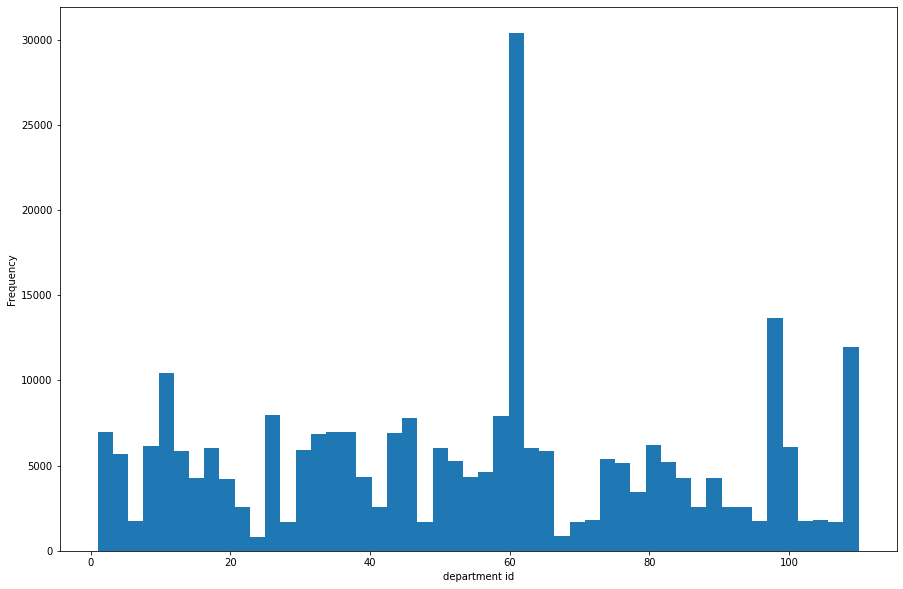

In [ ]:
fig=plt.figure(figsize=(15,10))
df['product_class_id'].plot.hist(bins = 50)
plt.xlabel('department id')

**Frequency Plot Of Product Id**

Text(0.5, 0, 'product id')

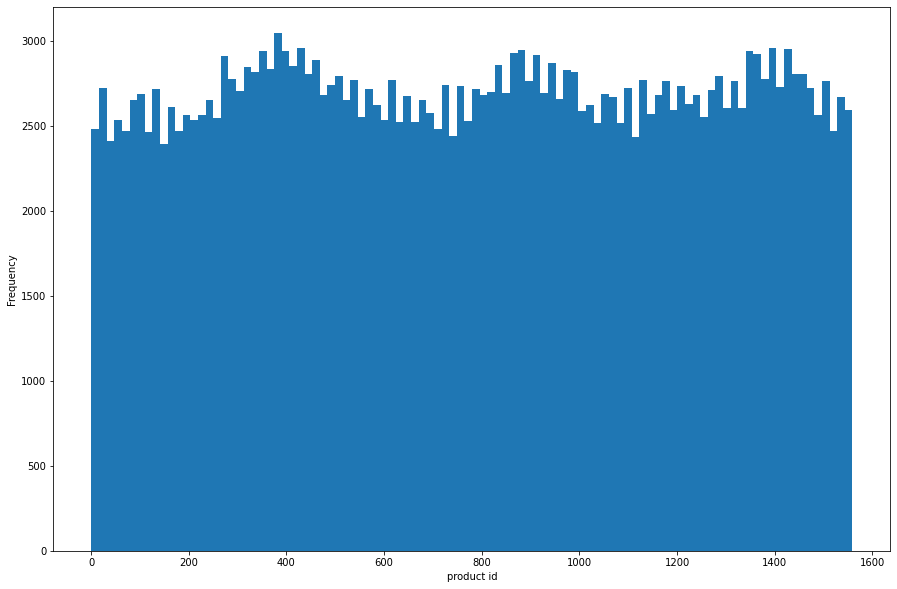

In [ ]:
fig=plt.figure(figsize=(15,10))
df['product_id'].plot.hist(bins = 100)
plt.xlabel('product id')

**Frequency Plot Of Unit Sales**

Text(0.5, 0, 'Unit Sales')

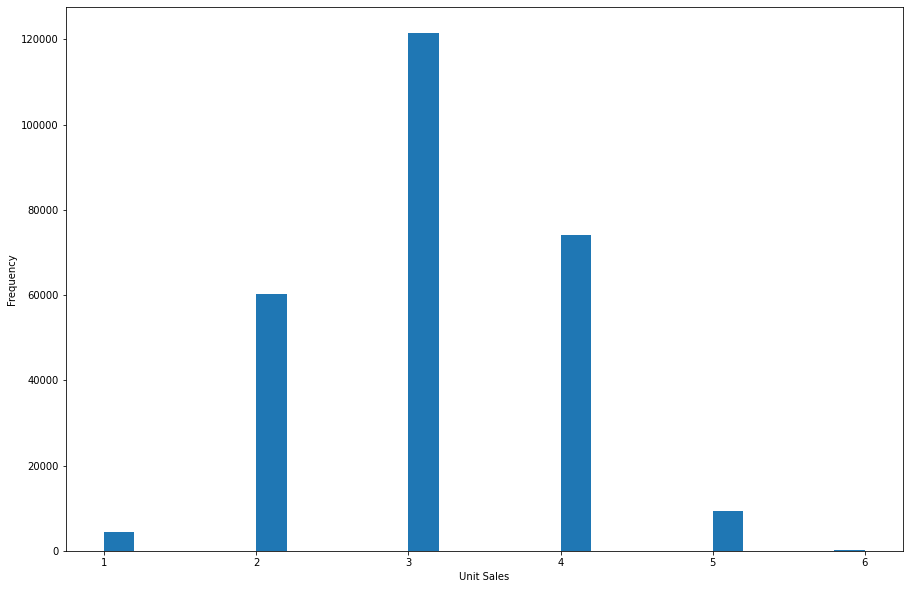

In [ ]:
fig=plt.figure(figsize=(15,10))
df['unit_sales'].plot.hist(bins = 25)
plt.xlabel('Unit Sales')

**When do people order**

**Year**

Text(0.5, 0, 'year')

([<matplotlib.axis.XTick at 0x7f8bedf07d90>,
 <a list of 4 Text major ticklabel objects>)

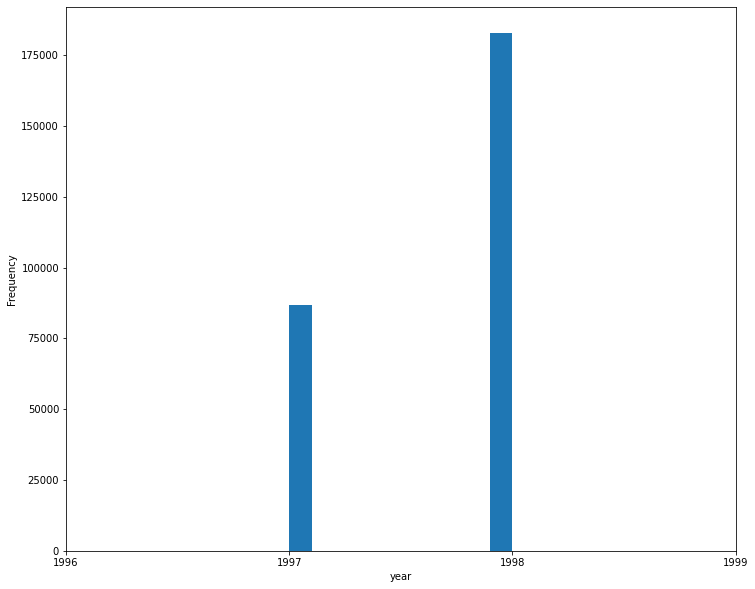

In [ ]:
fig=plt.figure(figsize=(12,10))
df['the_year'].plot.hist(bins=10)
plt.xlabel('year')
plt.xticks([1996,1997,1998,1999])

**Month**

Text(0.5, 0, 'Month')

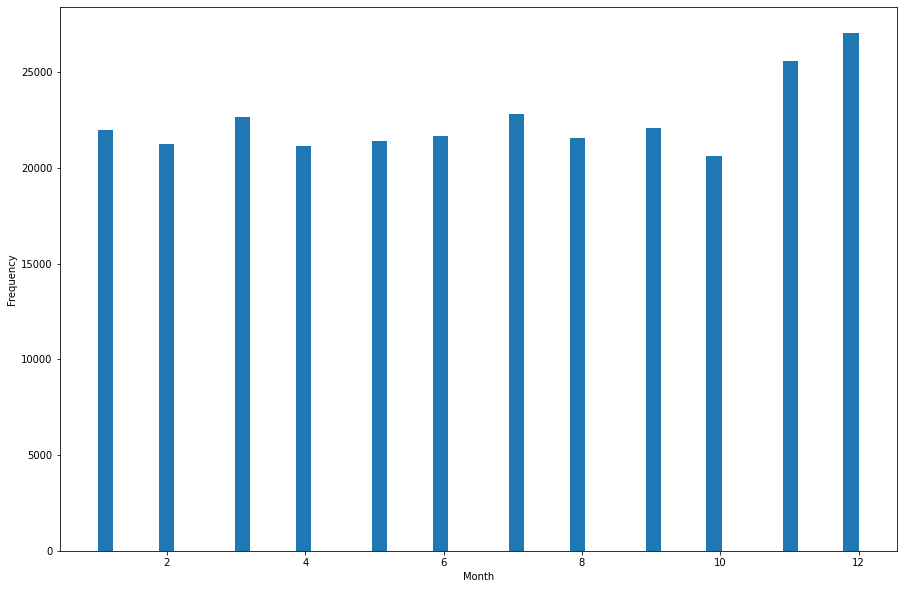

In [ ]:
fig=plt.figure(figsize=(15,10))
df['the_month'].plot.hist(bins=50)
plt.xlabel('Month')

**Day Of Month**

Text(0.5, 0, 'Day of month')

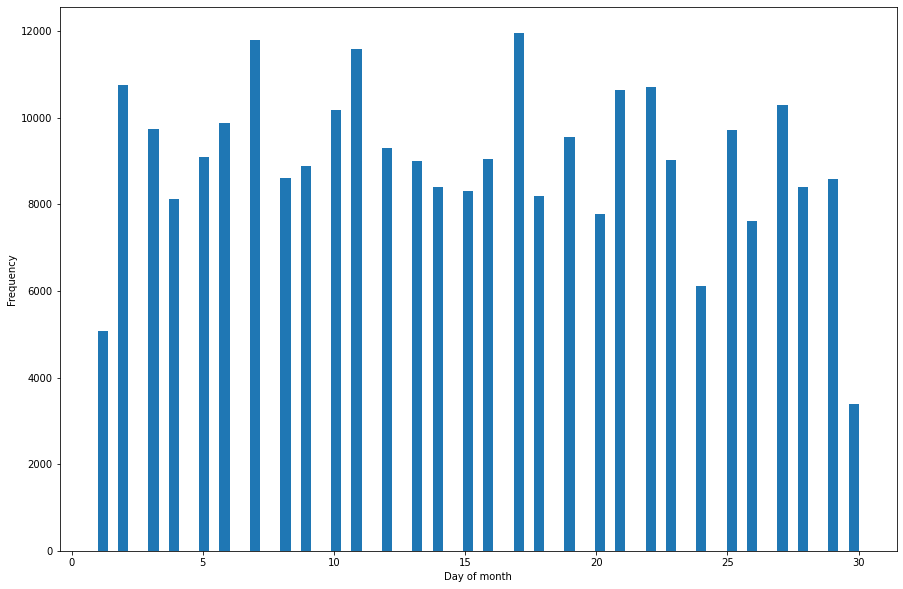

In [ ]:
fig=plt.figure(figsize=(15,10))
df['day_of_month'].plot.hist(bins=75)
plt.xlabel('Day of month')

**Day Of Week**

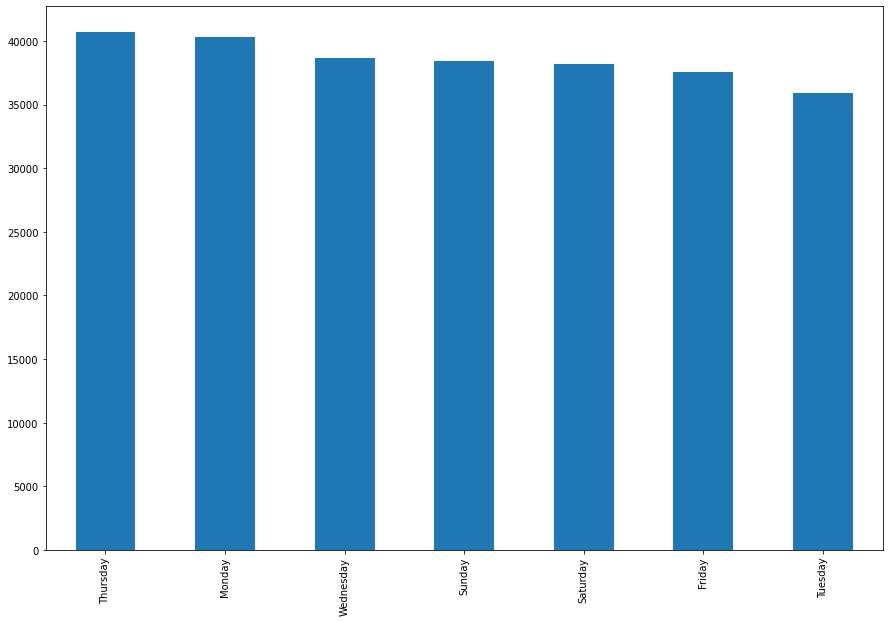

In [ ]:
df_day_freq=df['the_day'].value_counts()
fig=plt.figure(figsize=(15, 10))
df_day_freq.plot.bar() 

### Top choices

**Top 10 First Choices in Products**

In [ ]:
df.head()

product_id  time_id  customer_id  store_id  store_sales  store_cost  \
0         337      371         6280         2         1.50      0.5100   
1         963      371         4018         2         2.40      0.7200   
2        1512      371         6280         2         1.62      0.6318   
3         181      371         4018         2         2.79      1.0323   
4         483      371         4382         2         3.88      1.7072   

   unit_sales           city state_province country  customer_region_id  \
0           2      Anacortes             WA     USA                  79   
1           1  Sedro Woolley             WA     USA                  80   
2           3      Anacortes             WA     USA                  79   
3           3  Sedro Woolley             WA     USA                  80   
4           2      Anacortes             WA     USA                  79   

   yearly_income gender  total_children  num_children_at_home  \
0    $30K - $50K      F               5                     0   
1   $90K - $110K      F               4                     0   
2    $30K - $50K      F               5                     0   
3   $90K - $110K      F               4                     0   
4  $130K - $150K      F               0                     0   

             education date_accnt_opened member_card      occupation  \
0   High School Degree          14/01/93      Bronze  Skilled Manual   
1  Partial High School          07/05/92      Silver      Management   
2   High School Degree          14/01/93      Bronze  Skilled Manual   
3  Partial High School          07/05/92      Silver      Management   
4      Graduate Degree          25/07/92      Silver      Management   

  houseowner  num_cars_owned  product_class_id  brand_name  \
0          Y               3                58      Better   
1          Y               2                58  Just Right   
2          Y               3                 5      Jardon   
3          Y               2                61    High Top   
4          N               2                61   Tell Tale   

                     product_name          SKU   SRP  gross_weight  \
0       Better Turkey Noodle Soup  17979437708  0.75          8.34   
1  Just Right Chicken Noodle Soup  22934378981  2.40         20.50   
2                Jardon Spaghetti  53042894005  0.54         13.70   
3                High Top Lettuce  79397689700  0.93         16.10   
4       Tell Tale Corn on the Cob  80806578993  1.94         13.00   

   net_weight  recyclable_package  low_fat  units_per_case  cases_per_pallet  \
0        7.34                   1        1               9                10   
1       18.50                   1        1               6                13   
2       10.60                   1        0              28                13   
3       14.10                   0        1              23                 5   
4       10.00                   1        0               3                10   

   shelf_width  shelf_height  shelf_depth       subcategory       category  \
0        18.40          21.6         4.76              Soup    Canned Soup   
1         6.68          10.6         9.16              Soup    Canned Soup   
2        12.80          12.6         9.81             Pasta  Starchy Foods   
3        16.10          15.1        14.50  Fresh Vegetables     Vegetables   
4        20.80          21.6         5.86  Fresh Vegetables     Vegetables   

      department family     store_type  region_id store_name  store_number  \
0   Canned Foods   Food  Small Grocery         78    Store 2             2   
1   Canned Foods   Food  Small Grocery         78    Store 2             2   
2  Starchy Foods   Food  Small Grocery         78    Store 2             2   
3        Produce   Food  Small Grocery         78    Store 2             2   
4        Produce   Food  Small Grocery         78    Store 2             2   

  store_street_address  store_city store_state  store_postal_code  \
0

In [ ]:
df['products'] = 'Products'
products = df.truncate(before = 605, after = 615)

products = nx.from_pandas_edgelist(products, source = 'products', target = 'product_name', edge_attr = True)

In [ ]:
products

{'American Roasted Chicken': Text(-0.21260807340795201, -0.98759094112416, 'American Roasted Chicken'),
 'Blue Label Large Canned Shrimp': Text(0.7422329149366355, 0.6652034790324364, 'Blue Label Large Canned Shrimp'),
 'CDR Oregano': Text(-0.40415720956680357, 0.9115721705858348, 'CDR Oregano'),
 'Colony Rye Bread': Text(-1.0, -0.10242902379102851, 'Colony Rye Bread'),
 'Fantastic Rye Bread': Text(0.21311442640807493, 0.990660400516186, 'Fantastic Rye Bread'),
 'Good Light Beer': Text(-0.7426450862395401, -0.6647680626987673, 'Good Light Beer'),
 'Hilltop Deodorant': Text(0.8724814774748799, -0.5058093201588355, 'Hilltop Deodorant'),
 'Moms Roasted Chicken': Text(-0.868744029131467, 0.5046048915687253, 'Moms Roasted Chicken'),
 'Products': Text(-0.0011421889181419524, -0.001965012561850095, 'Products'),
 'Sphinx Rye Bread': Text(0.4040575203641537, -0.9119855606517074, 'Sphinx Rye Bread'),
 'Steady Whitening Toothpast': Text(0.9974102480801604, 0.10250697928316611, 'Steady Whitening T

(-1.2097280760484168,
 1.2071383241285774,
 -1.1953073319963965,
 1.1983767913884225)

Text(0.5, 1.0, 'Top 10 First Choices in Products')

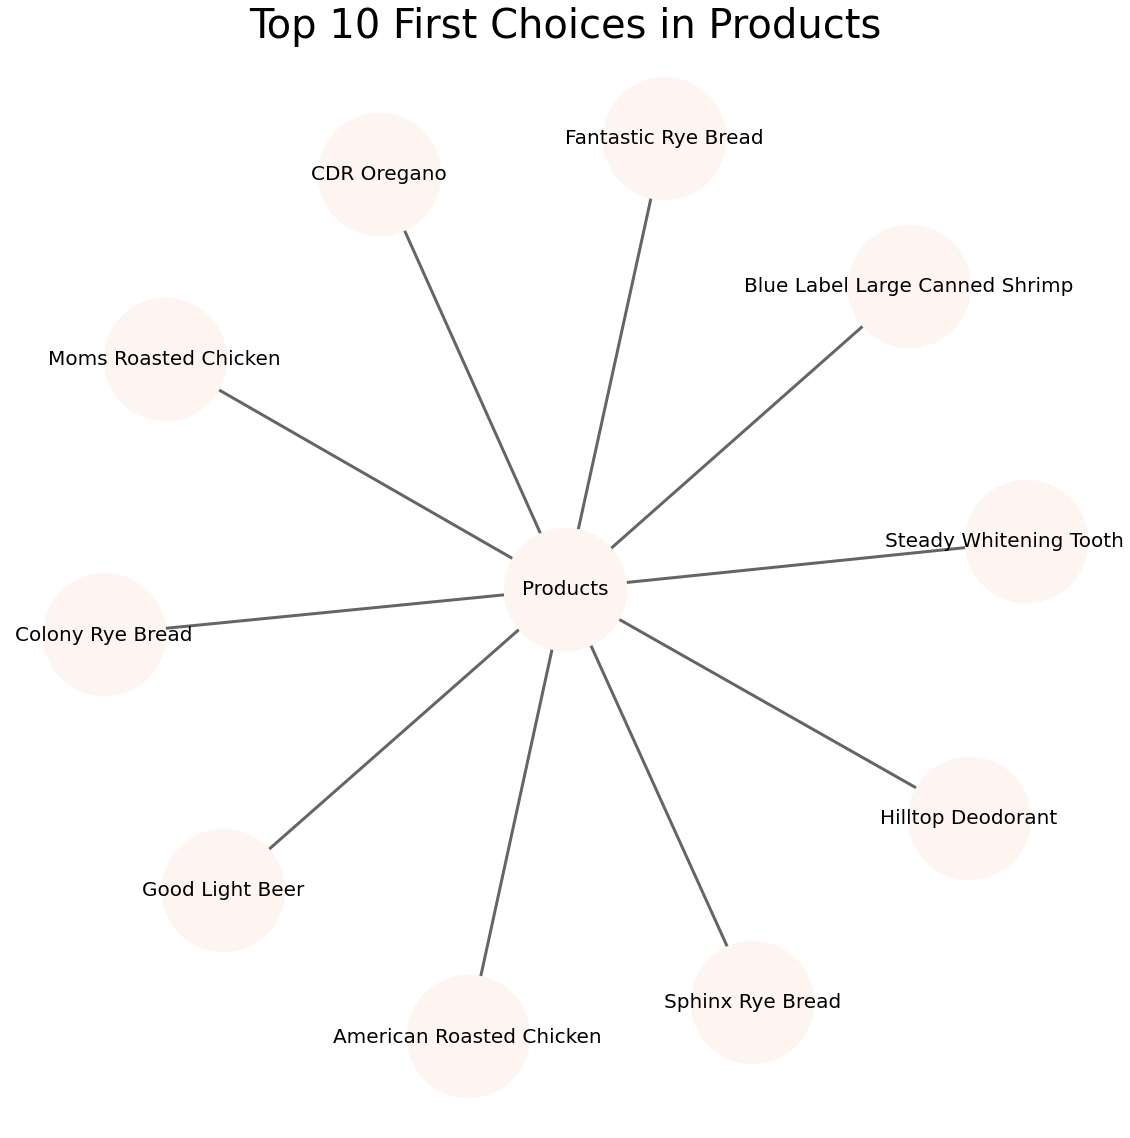

In [ ]:
warnings.filterwarnings('ignore')

plt.rcParams['figure.figsize']=(20,20)
pos=nx.spring_layout(products)
color=plt.cm.Reds(np.linspace(0,15,1))
nx.draw_networkx_nodes(products,pos,node_size=15000,node_color=color)
nx.draw_networkx_edges(products, pos, width = 3, alpha = 0.6, edge_color = 'black')
nx.draw_networkx_labels(products, pos, font_size = 20)
plt.axis('off')
plt.grid()
plt.title('Top 10 First Choices in Products', fontsize = 40)
plt.show()

**Top 10 First Choices in Department**

In [ ]:
df['departments'] = 'Departments'
departments = df.truncate(before = 150, after = 195)

departments = nx.from_pandas_edgelist(departments, source = 'departments', target = 'department', edge_attr = True)

{'Beverages': Text(-0.6283444000890219, -0.7768402982552791, 'Beverages'),
 'Canned Foods': Text(0.7432331515795375, -0.5844918944763172, 'Canned Foods'),
 'Canned Products': Text(-0.36591891375580854, 0.8930903501072965, 'Canned Products'),
 'Dairy': Text(0.13266333867978933, 0.9518761423909384, 'Dairy'),
 'Deli': Text(-1.0, 0.12924738505431416, 'Deli'),
 'Departments': Text(-0.00029672409216476735, 0.0010451055142593466, 'Departments'),
 'Eggs': Text(0.35768246997072745, -0.8990926443558821, 'Eggs'),
 'Frozen Foods': Text(-0.7307931120041633, 0.5633250678718248, 'Frozen Foods'),
 'Health and Hygiene': Text(0.9555784948939112, -0.13494231726280154, 'Health and Hygiene'),
 'Household': Text(0.900859261105415, 0.36535998943138515, 'Household'),
 'Periodicals': Text(-0.8055141305142216, -0.32206015987999387, 'Periodicals'),
 'Produce': Text(0.5825459755024991, 0.7436804033433833, 'Produce'),
 'Snack Foods': Text(-0.1416954112764967, -0.9301971294831293, 'Snack Foods')}

(-1.2053357419638608,
 1.160914236857772,
 -1.1278148230299063,
 1.1494938359377156)

Text(0.5, 1.0, 'Top 10 First Choices in Departments')

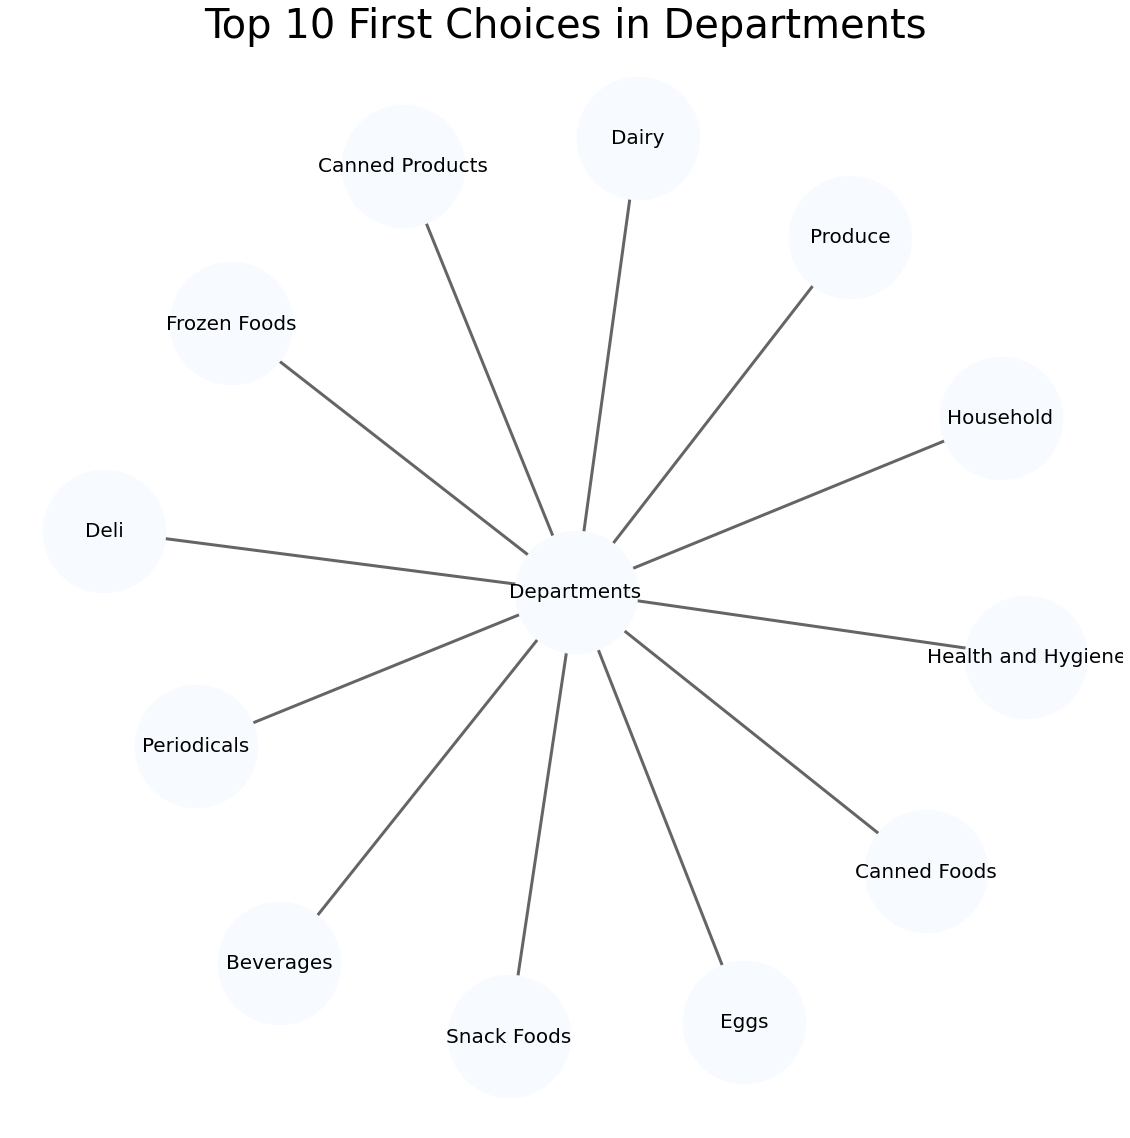

In [ ]:
warnings.filterwarnings('ignore')

plt.rcParams['figure.figsize']=(20,20)
pos=nx.spring_layout(departments)
color=plt.cm.Blues(np.linspace(0,15,1))
nx.draw_networkx_nodes(departments,pos,node_size=15000,node_color=color)
nx.draw_networkx_edges(departments, pos, width = 3, alpha = 0.6, edge_color = 'black')
nx.draw_networkx_labels(departments, pos, font_size = 20)
plt.axis('off')
plt.grid()
plt.title('Top 10 First Choices in Departments', fontsize = 40)
plt.show()

**Highest Ordered**

**Most Ordered Products**

In [ ]:
df['product_name'].value_counts()

Moms Roasted Chicken                           225
Tell Tale Fresh Lima Beans                     219
Steady Whitening Toothpast                     218
Hilltop Silky Smooth Hair Conditioner          216
Steady Childrens Cold Remedy                   214
Nationeel Dried Apples                         214
Ebony Mixed Nuts                               213
Hilltop Mint Mouthwash                         213
Sunset Economy Toilet Brush                    213
Special Wheat Puffs                            212
Ebony Fresh Lima Beans                         211
Hermanos Potatos                               208
Red Wing Glass Cleaner                         208
BBB Best French Roast Coffee                   208
BBB Best Apple Butter                          207
Great English Muffins                          207
Hermanos Green Pepper                          207
Big Time Orange Popsicles                      207
Better Chicken Noodle Soup                     207
Great Pumpernickel Bread       

**Most Ordered Products in Percentage**

In [ ]:
df['product_name'].value_counts()/len(df)*100

Moms Roasted Chicken                           0.083420
Tell Tale Fresh Lima Beans                     0.081195
Steady Whitening Toothpast                     0.080825
Hilltop Silky Smooth Hair Conditioner          0.080083
Steady Childrens Cold Remedy                   0.079342
Nationeel Dried Apples                         0.079342
Ebony Mixed Nuts                               0.078971
Hilltop Mint Mouthwash                         0.078971
Sunset Economy Toilet Brush                    0.078971
Special Wheat Puffs                            0.078600
Ebony Fresh Lima Beans                         0.078229
Hermanos Potatos                               0.077117
Red Wing Glass Cleaner                         0.077117
BBB Best French Roast Coffee                   0.077117
BBB Best Apple Butter                          0.076746
Great English Muffins                          0.076746
Hermanos Green Pepper                          0.076746
Big Time Orange Popsicles                      0

**Most Visited Departments**

In [ ]:
df['department'].value_counts()

Produce                38041
Snack Foods            30983
Household              27590
Frozen Foods           27042
Baking Goods           20573
Canned Foods           19090
Dairy                  17195
Health and Hygiene     16643
Beverages              13624
Deli                   12130
Baked Goods             7951
Snacks                  6970
Alcoholic Beverages     6931
Starchy Foods           5198
Periodicals             4318
Eggs                    4099
Breakfast Foods         3462
Canned Products         1779
Meat                    1777
Checkout                1776
Seafood                 1688
Carousel                 860
Name: department, dtype: int64

**Most Visited Departments in Percentage**

In [ ]:
df['department'].value_counts()/len(df)*100

Produce                14.103886
Snack Foods            11.487098
Household              10.229127
Frozen Foods           10.025953
Baking Goods            7.627540
Canned Foods            7.077710
Dairy                   6.375130
Health and Hygiene      6.170473
Beverages               5.051164
Deli                    4.497256
Baked Goods             2.947872
Snacks                  2.584161
Alcoholic Beverages     2.569702
Starchy Foods           1.927184
Periodicals             1.600919
Eggs                    1.519724
Breakfast Foods         1.283553
Canned Products         0.659573
Meat                    0.658831
Checkout                0.658461
Seafood                 0.625834
Carousel                0.318849
Name: department, dtype: float64

**Most Visited Aisle**

In [ ]:
df['subcategory'].value_counts()

Fresh Vegetables      20859
Fresh Fruit           11972
Soup                   7919
Cheese                 7815
Dried Fruit            7758
Cookies                6930
Wine                   5189
Paper Wipes            5128
Canned Vegetables      5092
Frozen Vegetables      4435
Nuts                   4345
Chocolate Candy        4341
Milk                   4250
Preserves              4237
Chips                  4176
Eggs                   4099
Lightbulbs             3609
Sliced Bread           3586
Muffins                3517
Dips                   3506
Waffles                3501
Pizza                  3481
Cereal                 3462
Cooking Oil            3455
Personal Hygiene       3454
Deli Meats             3435
Batteries              3435
Juice                  3429
Popsicles              3393
Coffee                 3387
Soda                   3367
Pasta                  3148
Ice Cream              2736
Peanut Butter          2660
TV Dinner              2643
Deli Salads         

**Most Visited Aisle in Percentage**

In [ ]:
df['subcategory'].value_counts()/len(df)*100

Fresh Vegetables      7.733576
Fresh Fruit           4.438677
Soup                  2.936008
Cheese                2.897449
Dried Fruit           2.876316
Cookies               2.569331
Wine                  1.923847
Paper Wipes           1.901231
Canned Vegetables     1.887884
Frozen Vegetables     1.644298
Nuts                  1.610930
Chocolate Candy       1.609447
Milk                  1.575708
Preserves             1.570888
Chips                 1.548272
Eggs                  1.519724
Lightbulbs            1.338054
Sliced Bread          1.329527
Muffins               1.303945
Dips                  1.299867
Waffles               1.298013
Pizza                 1.290598
Cereal                1.283553
Cooking Oil           1.280958
Personal Hygiene      1.280587
Deli Meats            1.273543
Batteries             1.273543
Juice                 1.271318
Popsicles             1.257971
Coffee                1.255747
Soda                  1.248332
Pasta                 1.167136
Ice Crea

**BarPlot**

**BarPlot of Most Visied Aisle**

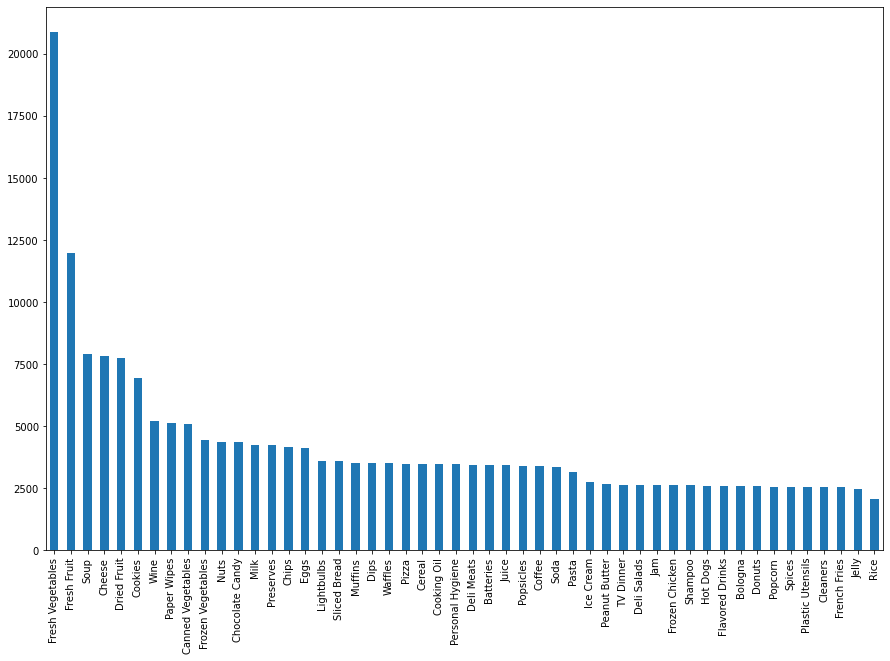

In [ ]:
df_subcategory_freq=df['subcategory'].value_counts().iloc[:50]
fig=plt.figure(figsize=(15,10))
df_subcategory_freq.plot.bar()

**BarPlot of Most Visited Department**

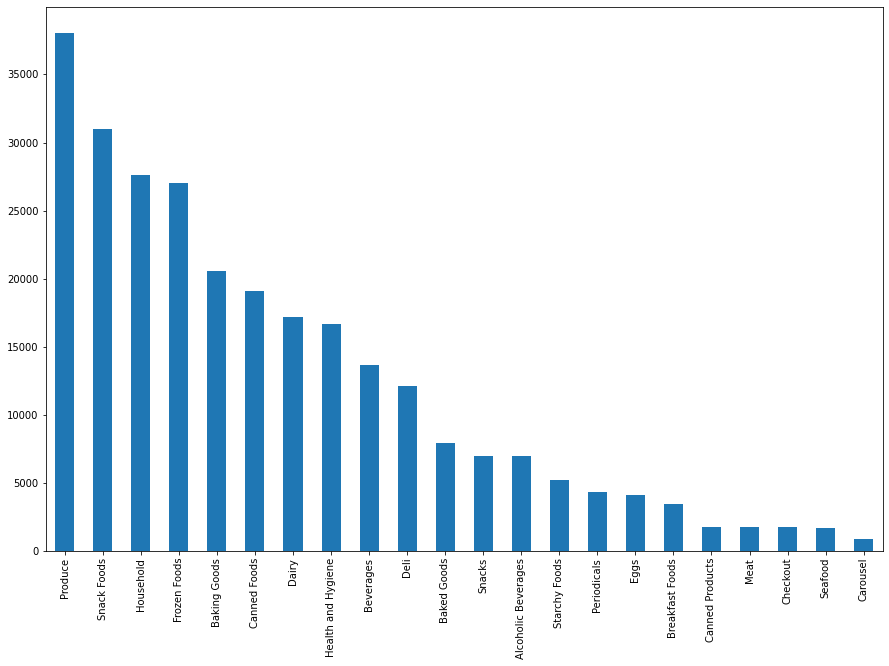

In [ ]:
fig=plt.figure(figsize=(15,10))
df['department'].value_counts().plot(kind='bar')

**BarPlot of Most Bought Product**

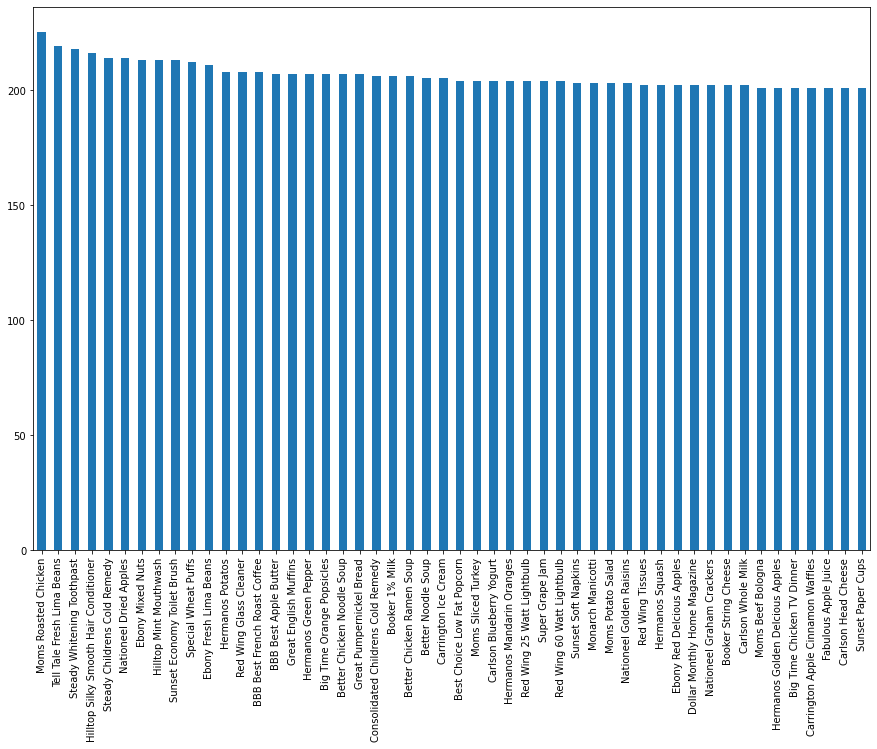

In [ ]:
df_freq_products=df['product_name'].value_counts().iloc[:50]
fig=plt.figure(figsize=(15, 10))
df_freq_products.plot.bar() 

**Array of Most Bought Product**

In [ ]:
y=df_freq_products.head(50).to_frame()
y.index

Index(['Moms Roasted Chicken', 'Tell Tale Fresh Lima Beans',
       'Steady Whitening Toothpast', 'Hilltop Silky Smooth Hair Conditioner',
       'Steady Childrens Cold Remedy', 'Nationeel Dried Apples',
       'Ebony Mixed Nuts', 'Hilltop Mint Mouthwash',
       'Sunset Economy Toilet Brush', 'Special Wheat Puffs',
       'Ebony Fresh Lima Beans', 'Hermanos Potatos', 'Red Wing Glass Cleaner',
       'BBB Best French Roast Coffee', 'BBB Best Apple Butter',
       'Great English Muffins', 'Hermanos Green Pepper',
       'Big Time Orange Popsicles', 'Better Chicken Noodle Soup',
       'Great Pumpernickel Bread', 'Consolidated Childrens Cold Remedy',
       'Booker 1% Milk', 'Better Chicken Ramen Soup', 'Better Noodle Soup',
       'Carrington Ice Cream', 'Best Choice Low Fat Popcorn',
       'Moms Sliced Turkey', 'Carlson Blueberry Yogurt',
       'Hermanos Mandarin Oranges', 'Red Wing 25 Watt Lightbulb',
       'Super Grape Jam', 'Red Wing 60 Watt Lightbulb', 'Sunset Soft Napkins',
   

**TreeMap for Most Bought Products**

Text(0.5, 1.0, 'tree map for frequent products')

(0.0, 100.0, 0.0, 100.0)

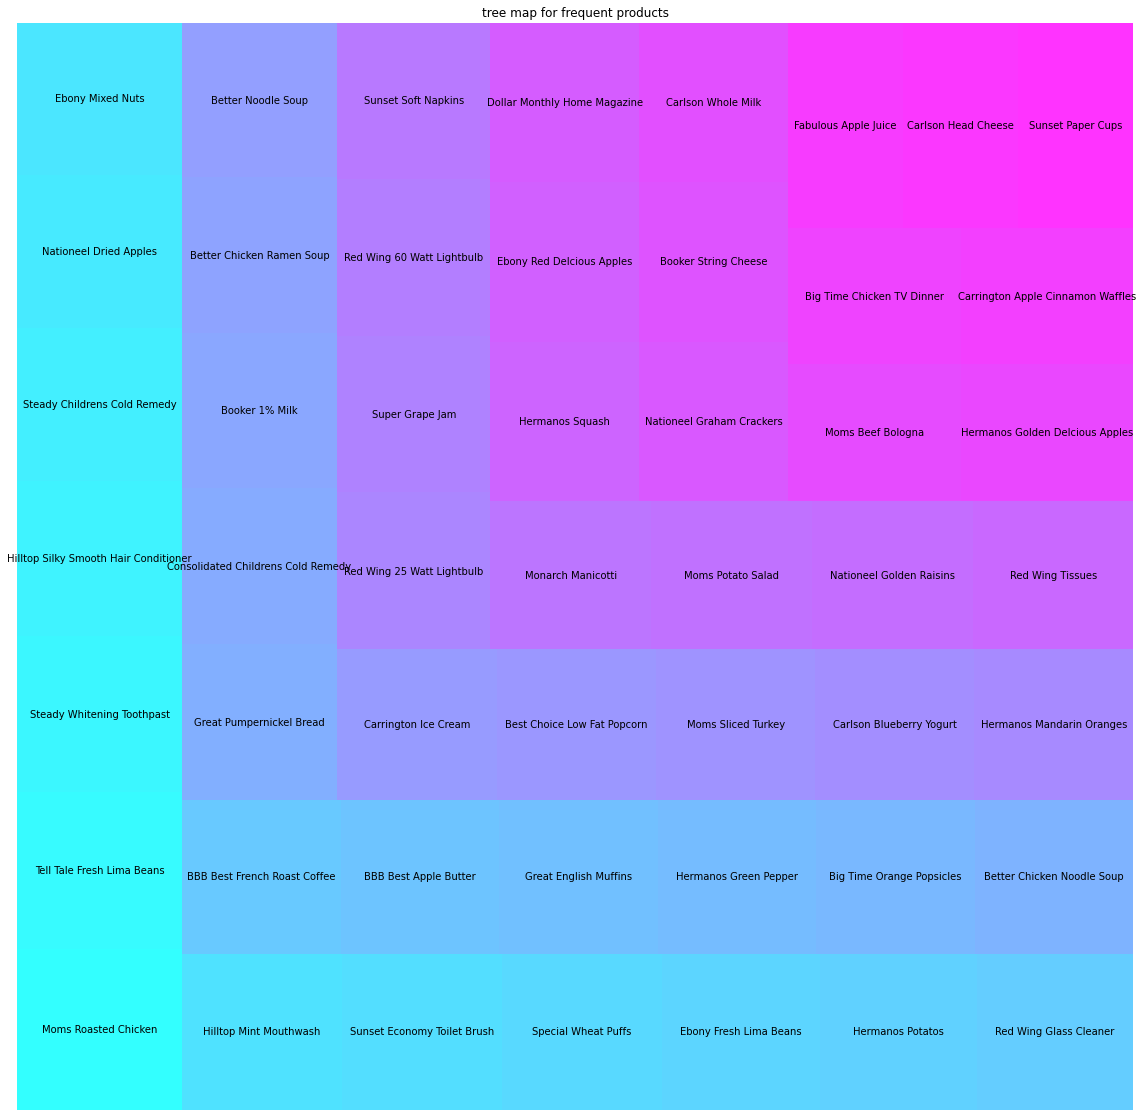

In [ ]:
plt.rcParams['figure.figsize']=(20,20)
color=plt.cm.cool(np.linspace(0,1,50))
squarify.plot(sizes=y.values,label=y.index,alpha=0.8,color=color)
plt.title('tree map for frequent products')
plt.axis('off')

# Data Manipulation

In [ ]:
df.shape

(269720, 76)

**Drop Duplicates**

In [ ]:
df.drop_duplicates()

In [ ]:
df.shape

**Missing Values**

In [ ]:
df.isnull().sum()

**Datatypes**

In [ ]:
df.dtypes

# Bivariate Analysis

**Bar Plot**

**Bar Plot between customers and their products per order**

In [ ]:
data_user_orders_num=df.groupby('customer_id')['unit_sales'].count()
data_user_orders_num

In [ ]:
source_data = {}
for i in range(10):
    source_data[str(10*i)+'~'+str(10*(i+1))]=len([x for x in list(data_user_orders_num) if x>=i*10 and x<(i+1)*10])
    
source_data

In [ ]:
font_size=10
fig_size=(8,6)    
mpl.rcParams['font.size']=font_size
mpl.rcParams['figure.figsize']=fig_size
bar_width=0.3

 
x_axis = tuple(source_data.keys())
y_axis = tuple(source_data.values())
#assign color
plt.bar(x_axis, y_axis, color='rgb')  
# descrpitions for x-axis, y-axis
plt.xlabel('Unit sales')  
plt.ylabel("No. of customers") 
plt.title("Orders Scatter Plot") 
plt.show()

**Transaction ID** - create transaction id which denotes a basket

In [ ]:
df['transaction_id'] = df['customer_id'].astype(str) + df['time_id'].astype(str)

In [ ]:
df.head()

In [ ]:
df.shape

**Filtering out Columns**

In [ ]:
cols = [76,2,0,23]
order_products=df[df.columns[cols]]

In [ ]:
order_products.head()

**Average products bought by customers per order**

In [ ]:
data_user_products_num1=order_products.groupby('transaction_id')['product_id'].count()
data_user_products_num1=pd.DataFrame(data_user_products_num1)

In [ ]:
data_user_products_num2.head()

In [ ]:
data_user_products_num1['transaction_id']=list(data_user_products_num1.index)
data_user_products_num1.columns=['product_num','orderid']

In [ ]:

data_user_products_num2=pd.merge(data_user_products_num1,df[['transaction_id','customer_id']],on='transaction_id',how='left')

In [ ]:


data_user_products_num3=data_user_products_num2.groupby('customer_id')['product_num'].agg(['sum','count'])
data_user_products_num3['avg']=data_user_products_num3['sum']/data_user_products_num3['count']

In [ ]:
data_user_products_num3.head()

sum  count       avg
customer_id                      
3            186     30  6.200000
5              1      1  1.000000
6             72     16  4.500000
8            208     42  4.952381
9             85     13  6.538462

# Featured Products Department Wise

In [ ]:
cols = [1,36,38,24]
cols=list(map(lambda x: x - 1, cols))
departments=df[df.columns[cols]]
departments.head()

product_id       subcategory     department                    product_name
0         337              Soup   Canned Foods       Better Turkey Noodle Soup
1         963              Soup   Canned Foods  Just Right Chicken Noodle Soup
2        1512             Pasta  Starchy Foods                Jardon Spaghetti
3         181  Fresh Vegetables        Produce                High Top Lettuce
4         483  Fresh Vegetables        Produce       Tell Tale Corn on the Cob

**List Of Departments**

In [ ]:
temp=['department']
for i in temp:
    print('@@@@@@Value Count in',i,'@@@@@@@@@')
    print(df[i].value_counts())

@@@@@@Value Count in department @@@@@@@@@
Produce                38041
Snack Foods            30983
Household              27590
Frozen Foods           27042
Baking Goods           20573
Canned Foods           19090
Dairy                  17195
Health and Hygiene     16643
Beverages              13624
Deli                   12130
Baked Goods             7951
Snacks                  6970
Alcoholic Beverages     6931
Starchy Foods           5198
Periodicals             4318
Eggs                    4099
Breakfast Foods         3462
Canned Products         1779
Meat                    1777
Checkout                1776
Seafood                 1688
Carousel                 860
Name: department, dtype: int64


**Produce Department**

In [ ]:
produce=departments.loc[df['department'] == 'Produce']
produce.head()

product_id       subcategory department               product_name
3          181  Fresh Vegetables    Produce           High Top Lettuce
4          483  Fresh Vegetables    Produce  Tell Tale Corn on the Cob
18        1123  Fresh Vegetables    Produce          Tri-State Potatos
19         804  Fresh Vegetables    Produce      Ebony Elephant Garlic
20        1426  Fresh Vegetables    Produce    Hermanos Prepared Salad

**Featured Products in Produce Department**

In [ ]:
top_produce=produce['product_name'].value_counts().iloc[:10]
top_produce.head()

Tell Tale Fresh Lima Beans    219
Ebony Mixed Nuts              213
Ebony Fresh Lima Beans        211
Hermanos Potatos              208
Hermanos Green Pepper         207
Name: product_name, dtype: int64

**Featured Products in Snack Foods Department**

In [ ]:
snacks=df.loc[df['department']=='Snack Foods']
top_snacks=snacks['product_name'].value_counts().iloc[:10]
top_snacks.head()

Nationeel Dried Apples         214
Best Choice Low Fat Popcorn    204
Nationeel Golden Raisins       203
Nationeel Graham Crackers      202
Fort West BBQ Potato Chips     198
Name: product_name, dtype: int64

**Featured Products in HouseHold Department**

In [ ]:
household=df.loc[df['department']=='Household']
top_household=household['product_name'].value_counts().iloc[:10]
print(top_household)

Sunset Economy Toilet Brush    213
Red Wing Glass Cleaner         208
Red Wing 25 Watt Lightbulb     204
Red Wing 60 Watt Lightbulb     204
Sunset Soft Napkins            203
Red Wing Tissues               202
Red Wing Counter Cleaner       201
Sunset Paper Cups              201
Denny 60 Watt Lightbulb        200
Sunset Large Sponge            199
Name: product_name, dtype: int64


**Featured Products in Frozen Foods Department**

In [ ]:
frozen=df.loc[df['department']=='Frozen Foods']
top_frozen=frozen['product_name'].value_counts().iloc[:10]
print(top_frozen)

Big Time Orange Popsicles            207
Carrington Ice Cream                 205
Big Time Chicken TV Dinner           201
Carrington Apple Cinnamon Waffles    201
Big Time Frozen Broccoli             200
Carrington Beef TV Dinner            200
Big Time Pancake Mix                 200
Big Time Frozen Cheese Pizza         199
Carrington Ice Cream Sandwich        198
Carrington Blueberry Waffles         197
Name: product_name, dtype: int64


**Featured Products in Baking Goods Department**

In [ ]:
baking=df.loc[df['department']=='Baking Goods']
top_baking=baking['product_name'].value_counts().iloc[:10]
print(top_baking)

BBB Best Apple Butter               207
Super Grape Jam                     204
Landslide Strawberry Jam            198
BBB Best Strawberry Jelly           198
Super Strawberry Jelly              197
Super Creamy Peanut Butter          197
Super Chunky Peanut Butter          197
Super Extra Chunky Peanut Butter    195
BBB Best Apple Preserves            192
BBB Best Pepper                     191
Name: product_name, dtype: int64


**Featured Products in Canned Foods Department**

In [ ]:
canned=df.loc[df['department']=='Canned Foods']
top_canned=canned['product_name'].value_counts().iloc[:10]
print(top_canned)

Better Chicken Noodle Soup       207
Better Chicken Ramen Soup        206
Better Noodle Soup               205
Better Fancy Canned Clams        199
Better Fancy Canned Anchovies    198
Better Canned Tuna in Oil        198
Just Right Turkey Noodle Soup    197
Just Right Chicken Ramen Soup    197
Just Right Rice Soup             196
Better Canned Tuna in Water      195
Name: product_name, dtype: int64


**Featured Products in Dairy Department**

In [ ]:
dairy=(df.loc[df['department'] == 'Dairy'])
top_dairy=dairy['product_name'].value_counts().iloc[:10]
print(top_dairy)

Booker 1% Milk                   206
Carlson Blueberry Yogurt         204
Carlson Whole Milk               202
Booker String Cheese             202
Carlson Head Cheese              201
Carlson Buttermilk               199
Carlson Low Fat String Cheese    199
Carlson Jack Cheese              198
Carlson Havarti Cheese           197
Carlson 1% Milk                  196
Name: product_name, dtype: int64


**Featured Products in Health and Hygiene Department**

In [ ]:
dairy=(df.loc[df['department'] == 'Health and Hygiene'])
top_dairy=dairy['product_name'].value_counts().iloc[:10]
print(top_dairy)

Steady Whitening Toothpast               218
Hilltop Silky Smooth Hair Conditioner    216
Steady Childrens Cold Remedy             214
Hilltop Mint Mouthwash                   213
Consolidated Childrens Cold Remedy       206
Steady 200 MG Ibuprofen                  200
Bird Call 200 MG Acetominifen            198
Steady 200 MG Acetominifen               198
Hilltop Extra Moisture Shampoo           197
Hilltop Deodorant                        197
Name: product_name, dtype: int64


**Featured Products in Beverages Department**

In [ ]:
dairy=(df.loc[df['department'] == 'Beverages'])
top_dairy=dairy['product_name'].value_counts().iloc[:10]
print(top_dairy)

BBB Best French Roast Coffee    208
Fabulous Apple Juice            201
Fabulous Orange Juice           200
Fabulous Cranberry Juice        199
Skinner Strawberry Drink        198
BBB Best Decaf Coffee           195
Excellent Mango Drink           195
Token Diet Cola                 195
Excellent Cream Soda            192
Fabulous Strawberry Drink       191
Name: product_name, dtype: int64


**Featured Products in Deli Department**

In [ ]:
dairy=(df.loc[df['department'] == 'Deli'])
top_dairy=dairy['product_name'].value_counts().iloc[:10]
print(top_dairy)

Moms Roasted Chicken       225
Moms Sliced Turkey         204
Moms Potato Salad          203
Moms Beef Bologna          201
Moms Foot-Long Hot Dogs    196
American Sliced Ham        195
Moms Chicken Hot Dogs      195
Moms Low Fat Cole Slaw     195
Moms Pimento Loaf          192
Moms Turkey Hot Dogs       190
Name: product_name, dtype: int64


**Featured Products in Alcoholic Beverages Department**

In [ ]:
dairy=(df.loc[df['department'] == 'Alcoholic Beverages'])
top_dairy=dairy['product_name'].value_counts().iloc[:10]
print(top_dairy)

Pearl Chablis Wine                  197
Pearl Chardonnay Wine               193
Good Imported Beer                  193
Pearl Light Beer                    191
Pearl White Zinfandel Wine          189
Good Chablis Wine                   189
Pearl Imported Beer                 187
Top Measure White Zinfandel Wine    187
Pearl Chardonnay                    185
Pearl Merlot Wine                   185
Name: product_name, dtype: int64


**Featured Products in Starchy Foods Department**

In [ ]:
dairy=(df.loc[df['department'] == 'Starchy Foods'])
top_dairy=dairy['product_name'].value_counts().iloc[:10]
print(top_dairy)

Monarch Manicotti        203
Monarch Rice Medly       199
Colossal Manicotti       188
Medalist Thai Rice       186
Shady Lake Rice Medly    186
Colossal Ravioli         185
Shady Lake Ravioli       185
Monarch Spaghetti        183
Discover Manicotti       183
Medalist Rice Medly      178
Name: product_name, dtype: int64


**Featured Products in Eggs Department**

In [ ]:
dairy=(df.loc[df['department'] == 'Eggs'])
top_dairy=dairy['product_name'].value_counts().iloc[:10]
print(top_dairy)

Urban Large Brown Eggs         194
Urban Small Brown Eggs         189
National Large Eggs            187
Urban Egg Substitute           186
Urban Small Eggs               175
Urban Large Eggs               174
Giant Large Eggs               170
Giant Small Eggs               168
Blue Medal Small Eggs          167
Blue Medal Large Brown Eggs    166
Name: product_name, dtype: int64


# Market Basket Analysis

![market-basket-analysis.png](attachment:market-basket-analysis.png)

**Importing Libraries**

In [ ]:
import pandas as pd 
import numpy as np 
from mlxtend.frequent_patterns import apriori
from mlxtend.frequent_patterns import association_rules
from sklearn.preprocessing import LabelEncoder
import seaborn as sns
import matplotlib.pyplot as plt

**Filtering the Columns**

In [ ]:
cols = [77,3,1,24,7,2]
cols=list(map(lambda x: x - 1, cols))
product_name=df[df.columns[cols]]

In [ ]:
product_name.head()

transaction_id  customer_id  product_id                    product_name  \
0        6280371         6280         337       Better Turkey Noodle Soup   
1        4018371         4018         963  Just Right Chicken Noodle Soup   
2        6280371         6280        1512                Jardon Spaghetti   
3        4018371         4018         181                High Top Lettuce   
4        4382371         4382         483       Tell Tale Corn on the Cob   

   unit_sales  time_id  
0           2      371  
1           1      371  
2           3      371  
3           3      371  
4           2      371

**Counting each product** The number of transactions a product appeared in

In [ ]:
productCountDf = product_name.groupby("product_id",as_index = False)['transaction_id'].count()

In [ ]:
productCountDf.head()

product_id  transaction_id
0           1              85
1           2             155
2           3             148
3           4             154
4           5             144

**Arranging Top Products**

In [ ]:
productCountDf = productCountDf.sort_values("transaction_id",ascending = False)

In [ ]:
productCountDf.head()

product_id  transaction_id
381          382             225
501          502             219
425          426             218
1361        1362             216
864          865             214

**Top 100 most frequently purchased products**

In [ ]:
topProdFrame = productCountDf.iloc[0:100,:]
productId= topProdFrame.loc[:,["product_id"]]

In [ ]:
topProdFrame

product_id  transaction_id
381          382             225
501          502             219
425          426             218
1361        1362             216
864          865             214
439          440             214
826          827             213
1408        1409             213
1379        1380             213
951          952             212
812          813             211
454          455             208
914          915             208
1433        1434             208
273          274             207
335          336             207
927          928             207
393          394             207
1427        1428             207
276          277             207
1307        1308             206
750          751             206
339          340             206
1351        1352             205
333          334             205
230          231             204
1452        1453             204
442          443             204
372          373             204
303          304             204
455          456             204
383          384             204
1397        1398             203
883          884             203
385          386             203
871          872             203
819          820             202
848          849             202
1296        1297             202
462          463             202
479          480             202
1440        1441             202
370          371             202
1342        1343             201
1290        1291             201
1430        1431             201
407          408             201
453          454             201
1388        1389             201
1435        1436             201
375          376             201
1445        1446             201
947          948             201
361          362             201
131          132             200
945          946             200
409          410             200
1346        1347             200
416          417             200
491          492             200
434          435             200
367          368             199
1410        1411             199
344          345             199
1387        1388             199
402          403             199
946          947             199
886          887             199
359          360             199
868          869             198
854          855             198
548          549             198
1352        1353             198
1103        1104             198
517          518             198
1389        1390             198
1062        1063             198
616          617             198
902          903             198
343          344             198
1466        1467             198
435          436             198
876          877             198
356          357             198
923          924             198
813          814             198
341          342             198
1251        1252             198
350          351             198
966          967             197
296          297             197
1365        1366             197
881          882             197
413          414             197
1367        1368             197
963          964             197
445          446             197
1391        1392             197
1372        1373             197
1336        1337             197

**Orders containting the the most frequently purchased products**

In [ ]:
MarketBasketdf = product_name[0:0]
for i in range(0,99):
    pId = productId.iloc[i]['product_id'] 
    stDf = product_name[product_name.product_id == pId ]
    MarketBasketdf = MarketBasketdf.append(stDf,ignore_index = False)

In [ ]:
MarketBasketdf.head()

transaction_id  customer_id  product_id          product_name  \
609         2808742         2808         382  Moms Roasted Chicken   
1981          76462           76         382  Moms Roasted Chicken   
3528        3261062          326         382  Moms Roasted Chicken   
3680       21731062         2173         382  Moms Roasted Chicken   
4290         630679          630         382  Moms Roasted Chicken   

      unit_sales  time_id  
609            3      742  
1981           3      462  
3528           1     1062  
3680           4     1062  
4290           2      679

**Putting the items into 1 transaction**

In [ ]:
basket = MarketBasketdf.groupby(['transaction_id','product_name'])['unit_sales'].sum().unstack().reset_index().fillna(0).set_index('transaction_id')

In [ ]:
basket.head(20)

product_name    ADJ Rosy Sunglasses  BBB Best Apple Butter  \
transaction_id                                               
10000850                        0.0                    0.0   
10000872                        0.0                    0.0   
10000903                        0.0                    0.0   
100011011                       0.0                    0.0   
10001793                        2.0                    0.0   
10001795                        0.0                    0.0   
10001800                        0.0                    0.0   
10001833                        0.0                    0.0   
10001937                        0.0                    0.0   
10001965                        0.0                    0.0   
100021007                       0.0                    0.0   
100021008                       0.0                    0.0   
100021046                       0.0                    0.0   
10002831                        0.0                    0.0   
10002911                        0.0                    0.0   
10002937                        0.0                    0.0   
10002949                        0.0                    0.0   
10003603                        0.0                    0.0   
10004458                        0.0                    0.0   
100081011                       0.0                    0.0   

product_name    BBB Best French Roast Coffee  BBB Best Strawberry Jelly  \
transaction_id                                                            
10000850                                 0.0                        0.0   
10000872                                 0.0                        0.0   
10000903                                 0.0                        0.0   
100011011                                4.0                        0.0   
10001793                                 0.0                        0.0   
10001795                                 0.0                        0.0   
10001800                                 0.0                        0.0   
10001833                                 0.0                        0.0   
10001937                                 0.0                        0.0   
10001965                                 0.0                        0.0   
100021007                                0.0                        0.0   
100021008                                0.0                        0.0   
100021046                                0.0                        0.0   
10002831                                 0.0                        0.0   
10002911                                 0.0                        0.0   
10002937                                 0.0                        0.0   
10002949                                 0.0                        0.0   
10003603                                 0.0                        3.0   
10004458                                 0.0                        0.0   
100081011                                0.0                        0.0   

product_name    Best Choice Low Fat Popcorn  Better Canned Tuna in Oil  \
transaction_id                                                           
10000850                                0.0                        0.0   
10000872                                0.0                        0.0   
10000903                                0.0                        0.0   
100011011                               0.0                        0.0   
10001793                                0.0                        0.0   
10001795                                0.0                        0.0   
10001800                                0.0                        0.0   
10001833                                0.0                        0.0   
10001937                                0.0                        0.0   
10001965                                0.0                        0.0   
100021007                               0.0                        0.0   
100021008             

# One Hot Encoding

**Converted the units into 1 encoded value**

In [ ]:
def encode_units(x):
    if x <= 0:
        return 0
    if x >= 1:
        return 1  

In [ ]:
basket_sets = basket.applymap(encode_units)

In [ ]:
basket_sets.head()

product_name    ADJ Rosy Sunglasses  BBB Best Apple Butter  \
transaction_id                                               
10000850                          0                      0   
10000872                          0                      0   
10000903                          0                      0   
100011011                         0                      0   
10001793                          1                      0   

product_name    BBB Best French Roast Coffee  BBB Best Strawberry Jelly  \
transaction_id                                                            
10000850                                   0                          0   
10000872                                   0                          0   
10000903                                   0                          0   
100011011                                  1                          0   
10001793                                   0                          0   

product_name    Best Choice Low Fat Popcorn  Better Canned Tuna in Oil  \
transaction_id                                                           
10000850                                  0                          0   
10000872                                  0                          0   
10000903                                  0                          0   
100011011                                 0                          0   
10001793                                  0                          0   

product_name    Better Chicken Noodle Soup  Better Chicken Ramen Soup  \
transaction_id                                                          
10000850                                 0                          0   
10000872                                 0                          0   
10000903                                 0                          0   
100011011                                0                          0   
10001793                                 1                          0   

product_name    Better Fancy Canned Anchovies  Better Fancy Canned Clams  \
transaction_id                                                             
10000850                                    0                          0   
10000872                                    0                          0   
10000903                                    0                          0   
100011011                                   0                          0   
10001793                                    0                          0   

product_name    Better Noodle Soup  Big Time Chicken TV Dinner  \
transaction_id                                                   
10000850                         0                           0   
10000872                         0                           0   
10000903                         0                           0   
100011011                        0                           0   
10001793                         0                           0   

product_name    Big Time Frozen Broccoli  Big Time Frozen Cheese Pizza  \
transaction_id                                                           
10000850                               0                             0   
10000872                               0                             0   
10000903                               0                             0   
100011011                              0                             0   
10001793                               0                             0   

product_name    Big Time Ice Cream  Big Time Orange Popsicles  \
transaction_id                                                  
10000850                         0                          0   
10000872                         0                          0   
10000903                         0                          0   
100011011                        0                          0   
10001793                         0                          0   

product_name    Big Time Pancake Mix 

**Size and shape of basket**

In [ ]:
basket_sets.size

1675971

In [ ]:
basket_sets.shape

(16929, 99)

In [ ]:
dummy=basket_sets.head(10000)

# Apriori Algorithm

**Importing Apriori and Association rules Libraries**

In [ ]:
from mlxtend.frequent_patterns import apriori
from mlxtend.frequent_patterns import association_rules

**Frequent items with support 0.01% using Apriori Algorithm**

In [ ]:
frequent_itemsets = apriori(dummy, min_support=0.0001, use_colnames=True)

In [ ]:
frequent_itemsets

support                                           itemsets
0      0.0112                              (ADJ Rosy Sunglasses)
1      0.0117                            (BBB Best Apple Butter)
2      0.0116                     (BBB Best French Roast Coffee)
3      0.0118                        (BBB Best Strawberry Jelly)
4      0.0119                      (Best Choice Low Fat Popcorn)
5      0.0113                        (Better Canned Tuna in Oil)
6      0.0120                       (Better Chicken Noodle Soup)
7      0.0120                        (Better Chicken Ramen Soup)
8      0.0122                    (Better Fancy Canned Anchovies)
9      0.0114                        (Better Fancy Canned Clams)
10     0.0128                               (Better Noodle Soup)
11     0.0117                       (Big Time Chicken TV Dinner)
12     0.0102                         (Big Time Frozen Broccoli)
13     0.0120                     (Big Time Frozen Cheese Pizza)
14     0.0112                               (Big Time Ice Cream)
15     0.0121                        (Big Time Orange Popsicles)
16     0.0131                             (Big Time Pancake Mix)
17     0.0118                    (Bird Call 200 MG Acetominifen)
18     0.0113                                   (Booker 1% Milk)
19     0.0112                             (Booker String Cheese)
20     0.0113                         (Carlson Blueberry Yogurt)
21     0.0115                               (Carlson Buttermilk)
22     0.0125                              (Carlson Head Cheese)
23     0.0117                              (Carlson Jack Cheese)
24     0.0131                    (Carlson Low Fat String Cheese)
25     0.0122                               (Carlson Whole Milk)
26     0.0112                (Carrington Apple Cinnamon Waffles)
27     0.0111                        (Carrington Beef TV Dinner)
28     0.0119                             (Carrington Ice Cream)
29     0.0107                    (Carrington Ice Cream Sandwich)
30     0.0118               (Consolidated Childrens Cold Remedy)
31     0.0123                          (Denny 60 Watt Lightbulb)
32     0.0110                     (Dollar Monthly Home Magazine)
33     0.0121                           (Ebony Fresh Lima Beans)
34     0.0119                                 (Ebony Mixed Nuts)
35     0.0118                        (Ebony Red Delcious Apples)
36     0.0123                                     (Ebony Squash)
37     0.0113                             (Fabulous Apple Juice)
38     0.0104                         (Fabulous Cranberry Juice)
39     0.0110                            (Fabulous Orange Juice)
40     0.0118                              (Fantastic Rye Bread)
41     0.0104                                  (Fast Beef Jerky)
42     0.0121                       (Fort West BBQ Potato Chips)
43     0.0126                                 (Framton City Map)
44     0.0136                            (Great English Muffins)
45     0.0138                         (Great Pumpernickel Bread)
46     0.0121                         (Hermanos Elephant Garlic)
47     0.0126                  (Hermanos Golden Delcious Apples)
48     0.0129                            (Hermanos Green Pepper)
49     0.0111                        (Hermanos Mandarin Oranges)
50     0.0127                                 (Hermanos Potatos)
51     0.0127                                  (Hermanos Squash)
52     0.0118                                 (Hermanos Tomatos)
53     0.0108                         (Hilltop 200 MG Ibuprofen)
54     0.0123                                (Hilltop Deodorant)
55     0.0121                   (Hilltop Extra Moisture Shampoo)
56     0.0121                           (Hilltop Mint Mouthwash)
57     0.0137            (Hilltop Silky Smooth Hair Conditioner)
58     0.0119                    (Just Right Chicken Ramen Soup)
59     0.0114                    (Just Right Turkey Noodle Soup)
60     0.0112                         (La

**Association rules using Apriori Algorithm**

In [ ]:
apriori_rules = association_rules(frequent_itemsets, metric="lift", min_threshold= 1)

In [ ]:
apriori_rules

antecedents  \
0                           (Better Fancy Canned Clams)   
1                                 (ADJ Rosy Sunglasses)   
2                            (Big Time Frozen Broccoli)   
3                                 (ADJ Rosy Sunglasses)   
4                                  (Carlson Buttermilk)   
5                                 (ADJ Rosy Sunglasses)   
6                                  (Carlson Whole Milk)   
7                                 (ADJ Rosy Sunglasses)   
8                   (Carrington Apple Cinnamon Waffles)   
9                                 (ADJ Rosy Sunglasses)   
10                           (Great Pumpernickel Bread)   
11                                (ADJ Rosy Sunglasses)   
12                                  (Sunset Paper Cups)   
13                                (ADJ Rosy Sunglasses)   
14                          (BBB Best Strawberry Jelly)   
15                              (BBB Best Apple Butter)   
16                              (BBB Best Apple Butter)   
17                         (Big Time Chicken TV Dinner)   
18                              (BBB Best Apple Butter)   
19                                (Carlson Head Cheese)   
20                              (BBB Best Apple Butter)   
21                              (Hermanos Green Pepper)   
22                              (BBB Best Apple Butter)   
23                                  (Monarch Manicotti)   
24                              (BBB Best Apple Butter)   
25                              (Nationeel Avocado Dip)   
26                              (BBB Best Apple Butter)   
27                            (Red Wing Plastic Knives)   
28                              (BBB Best Apple Butter)   
29                         (Tell Tale Fresh Lima Beans)   
30                       (BBB Best French Roast Coffee)   
31                                   (Framton City Map)   
32                       (BBB Best French Roast Coffee)   
33                           (Hermanos Elephant Garlic)   
34                                    (Hermanos Squash)   
35                       (BBB Best French Roast Coffee)   
36                       (BBB Best French Roast Coffee)   
37                             (Nationeel Dried Apples)   
38                         (Steady Whitening Toothpast)   
39                       (BBB Best French Roast Coffee)   
40                          (BBB Best Strawberry Jelly)   
41                        (Best Choice Low Fat Popcorn)   
42                          (BBB Best Strawberry Jelly)   
43                          (Better Canned Tuna in Oil)   
44                          (BBB Best Strawberry Jelly)   
45                         (Big Time Chicken TV Dinner)   
46                          (BBB Best Strawberry Jelly)   
47                           (Fabulous Cranberry Juice)   
48                          (BBB Best Strawberry Jelly)   
49                    (Hermanos Golden Delcious Apples)   
50                                   (Hermanos Potatos)   
51                          (BBB Best Strawberry Jelly)   
52                          (BBB Best Strawberry Jelly)   
53                      (Just Right Chicken Ramen Soup)   
54                           (Red Wing Counter Cleaner)   
55                          (BBB Best Strawberry Jelly)   
56                          (BBB Best Strawberry Jelly)   
57                            (Steady 200 MG Ibuprofen)   
58                          (BBB Best Strawberry Jelly)   
59                         (Tell Tale Fresh Lima Beans)   
60                                 (Big Time Ice Cream)   
61                        (Best Choice Low Fat Popcorn)   
62                        (Best Choice Low Fat Popcorn)   
63                                 (Carlson Buttermilk)   
64                           (Great Pumpernickel Bread)   
65                        (Best Choice Low Fat Popcorn)   
66                        (Best Choice Low Fat Popcorn)   
67                    (Hermanos 

**Filtering out co-realted products with higher Probability**

In [ ]:
apriori_rules[ (apriori_rules['lift'] >= 50) & (apriori_rules['confidence'] >= 0.01) ]

antecedents  \
949            (Moms Potato Salad, ADJ Rosy Sunglasses)   
950   (Better Chicken Noodle Soup, ADJ Rosy Sunglasses)   
955   (Better Chicken Noodle Soup, ADJ Rosy Sunglasses)   
956          (Special Wheat Puffs, ADJ Rosy Sunglasses)   
960       (Better Fancy Canned Clams, Ebony Mixed Nuts)   
962             (Ebony Mixed Nuts, ADJ Rosy Sunglasses)   
966   (Better Fancy Canned Clams, Great Pumpernickel...   
973         (Booker String Cheese, ADJ Rosy Sunglasses)   
978   (Mighty Good Monthly Sports Magazine, Carlson ...   
979   (Mighty Good Monthly Sports Magazine, ADJ Rosy...   
984          (Carlson Jack Cheese, ADJ Rosy Sunglasses)   
985   (Carlson Jack Cheese, Hilltop Silky Smooth Hai...   
986   (ADJ Rosy Sunglasses, Hilltop Silky Smooth Hai...   
990            (Moms Potato Salad, Special Wheat Puffs)   
991            (Moms Potato Salad, ADJ Rosy Sunglasses)   
992          (Special Wheat Puffs, ADJ Rosy Sunglasses)   
1003  (BBB Best Apple Butter, Big Time Frozen Cheese...   
1004  (Tell Tale Fresh Lima Beans, Big Time Frozen C...   
1008  (BBB Best Apple Butter, Fort West BBQ Potato C...   
1010  (Fort West BBQ Potato Chips, Carlson Head Cheese)   
1020  (BBB Best Apple Butter, Thresher White Chocola...   
1021  (BBB Best Apple Butter, Hermanos Elephant Garlic)   
1022  (Thresher White Chocolate Bar, Hermanos Elepha...   
1026            (Hermanos Squash, Carrington Ice Cream)   
1028  (Carrington Ice Cream, BBB Best French Roast C...   
1032  (Dollar Monthly Home Magazine, BBB Best French...   
1034  (BBB Best French Roast Coffee, Hilltop Silky S...   
1040  (BBB Best French Roast Coffee, Sunset Paper Pl...   
1045  (BBB Best Strawberry Jelly, Hilltop Mint Mouth...   
1046  (Best Choice Low Fat Popcorn, Hilltop Mint Mou...   
1051  (Red Wing Counter Cleaner, Better Canned Tuna ...   
1052  (BBB Best Strawberry Jelly, Better Canned Tuna...   
1053                         (Red Wing Counter Cleaner)   
1054                        (BBB Best Strawberry Jelly)   
1057             (Hermanos Potatos, Better Noodle Soup)   
1058    (BBB Best Strawberry Jelly, Better Noodle Soup)   
1062  (BBB Best Strawberry Jelly, Denny 60 Watt Ligh...   
1064  (Denny 60 Watt Lightbulb, Big Time Chicken TV ...   
1068   (BBB Best Strawberry Jelly, Sunset Soft Napkins)   
1070    (Sunset Soft Napkins, Fabulous Cranberry Juice)   
1075  (BBB Best Strawberry Jelly, Hilltop 200 MG Ibu...   
1080  (Better Fancy Canned Anchovies, Best Choice Lo...   
1082        (Best Choice Low Fat Popcorn, Ebony Squash)   
1087  (Best Choice Low Fat Popcorn, Carlson Low Fat ...   
1092  (Best Choice Low Fat Popcorn, Special Wheat Pu...   
1093  (Best Choice Low Fat Popcorn, Red Wing 25 Watt...   
1094  (Special Wheat Puffs, Red Wing 25 Watt Lightbulb)   
1098  (Better Canned Tuna in Oil, Carrington Apple C...   
1100  (Carrington Apple Cinnamon Waffles, Framton Ci...   
1104  (Better Canned Tuna in Oil, Carrington Ice Cre...   
1116     (Moms Potato Salad, Better Canned Tuna in Oil)   
1117       (Moms Potato Salad, Denny 60 Watt Lightbulb)   
1124  (Tell Tale Fresh Lima Beans, Denny 60 Watt Lig...   
1130                   (Ebony Squash, Framton City Map)   
1134  (Better Canned Tuna in Oil, Thresher Malted Mi...   
1135  (Better Canned Tuna in Oil, Hilltop Mint Mouth...   
1136  (Thresher Malted Milk Balls, Hilltop Mint Mout...   
1140     (Moms Potato Salad, Better Canned Tuna in Oil)   
1141  (Moms Potato Salad, Just Right Turkey Noodle S...   
1146   (Sunset Soft Napkins, Better Canned Tuna in Oil)   
1148  (Better Canned Tuna in Oil, Nationeel Golden R...   
1152  (Better Canned Tuna in Oil, Thresher White Cho...   
1153  (Better Canned Tuna in Oil, Nationeel Golden R...   
1158   (Sunset Soft Napkins, Better Canned Tuna in Oil)   
1160  (Better Canned Tuna in Oil, Thresher White Cho...   
1165  (Better Chicken Noodle Soup, Sunset Large Sponge)   
1166   (Sunset Large Sponge, Better Chicken Ramen Soup)   
1167                       (Bett

In [ ]:
apriori_rules.iloc[2640,0]

frozenset({'Ebony Squash', 'Red Wing Tissues'})

In [ ]:
apriori_rules.iloc[2640,1]

frozenset({'Ebony Red Delcious Apples',
           'Great English Muffins',
           'Super Grape Jam'})

# Recommendations using Apriori Algorithm

In [ ]:
def recommendations_using_Apriori(item):
    recommend = []
    for i in range(0,2646):
        if item == apriori_rules.iloc[i,0]:
            recommend.append(apriori_rules.iloc[i,1])
    
    return recommend

**5 Recommendations with Better Chicken Noodle Soup**

In [ ]:
product_name = {'Better Chicken Noodle Soup'}
recommentations=recommendations_using_Apriori(product_name)
print(*recommentations[0:5], sep = "\n")

frozenset({'Better Chicken Ramen Soup'})
frozenset({'Carlson Blueberry Yogurt'})
frozenset({'Framton City Map'})
frozenset({'Hermanos Green Pepper'})
frozenset({'Hilltop Extra Moisture Shampoo'})


**10 Recommendations with Moms Potato Salad**

In [ ]:
product_name = {'Moms Potato Salad'}
recommentations=recommendations_using_Apriori(product_name)
print(*recommentations[0:10], sep = "\n")

frozenset({'Better Chicken Noodle Soup'})
frozenset({'Big Time Frozen Cheese Pizza'})
frozenset({'Framton City Map'})
frozenset({'Great Pumpernickel Bread'})
frozenset({'Hermanos Green Pepper'})
frozenset({'Hilltop Extra Moisture Shampoo'})
frozenset({'Hilltop Silky Smooth Hair Conditioner'})
frozenset({'Moms Roasted Chicken'})
frozenset({'Nationeel Grape Fruit Roll'})
frozenset({'Red Wing 60 Watt Lightbulb'})


**15 Recommendations with Carrington Ice Cream Sandwich**

In [ ]:
product_name = {'Carrington Ice Cream Sandwich'}
recommentations=recommendations_using_Apriori(product_name)
print(*recommentations[0:15], sep = "\n")

frozenset({'Better Fancy Canned Anchovies'})
frozenset({'Fabulous Cranberry Juice'})
frozenset({'Great English Muffins'})
frozenset({'Hermanos Mandarin Oranges'})
frozenset({'Hermanos Squash'})
frozenset({'Hermanos Tomatos'})
frozenset({'Just Right Turkey Noodle Soup'})
frozenset({'Sunset Economy Toilet Brush'})
frozenset({'Better Canned Tuna in Oil', 'Just Right Turkey Noodle Soup'})
frozenset({'Fabulous Apple Juice', 'Better Fancy Canned Anchovies'})
frozenset({'Better Fancy Canned Anchovies', 'Fabulous Cranberry Juice'})
frozenset({'Booker 1% Milk', 'Framton City Map'})
frozenset({'Carlson Jack Cheese', 'Steady Childrens Cold Remedy'})
frozenset({'Carrington Beef TV Dinner', 'Denny 60 Watt Lightbulb'})


# Fpgrowth Algorithm

**Importing Fpgrowth Libraries**

In [ ]:
!pip install git+git://github.com/rasbt/mlxtend.git

  Cloning git://github.com/rasbt/mlxtend.git to /tmp/pip-req-build-ou9e3hkc
  Running command git clone -q git://github.com/rasbt/mlxtend.git /tmp/pip-req-build-ou9e3hkc
  Created wheel for mlxtend: filename=mlxtend-0.19.0.dev0-py2.py3-none-any.whl size=1592328 sha256=384df0114dafabfa4695cdf2f8ce4cd48f49bc14fca83c86e588d2f0fc60effd
  Stored in directory: /tmp/pip-ephem-wheel-cache-4bxdwy7l/wheels/8c/d2/39/72837b351435c21adf9296330ca3783d4be80aec9dae8387d1
Successfully built mlxtend
  Attempting uninstall: mlxtend
    Found existing installation: mlxtend 0.18.0
    Uninstalling mlxtend-0.18.0:
      Successfully uninstalled mlxtend-0.18.0


In [ ]:
from mlxtend.frequent_patterns import apriori, fpmax, fpgrowth

**Frequent Items with support 0.001% using Fpgrowth Algorithm**

In [ ]:
freq_items=fpgrowth(dummy,min_support=.0001,use_colnames=True)

In [ ]:
freq_items

support                                           itemsets
0      0.0120                                (Moms Potato Salad)
1      0.0136                            (Great English Muffins)
2      0.0131                    (Carlson Low Fat String Cheese)
3      0.0119                              (Sunset Large Sponge)
4      0.0113                             (Fabulous Apple Juice)
5      0.0116                     (BBB Best French Roast Coffee)
6      0.0124                              (Special Wheat Puffs)
7      0.0120                       (Better Chicken Noodle Soup)
8      0.0112                              (ADJ Rosy Sunglasses)
9      0.0121                        (Big Time Orange Popsicles)
10     0.0115                               (Carlson Buttermilk)
11     0.0112                       (Nationeel Grape Fruit Roll)
12     0.0123                          (Denny 60 Watt Lightbulb)
13     0.0111                           (Super Strawberry Jelly)
14     0.0111                        (Carrington Beef TV Dinner)
15     0.0121                       (Fort West BBQ Potato Chips)
16     0.0134                       (Red Wing 60 Watt Lightbulb)
17     0.0126                                 (Framton City Map)
18     0.0122                               (Carlson Whole Milk)
19     0.0118                        (BBB Best Strawberry Jelly)
20     0.0104                         (Fabulous Cranberry Juice)
21     0.0120                     (Big Time Frozen Cheese Pizza)
22     0.0128                       (Steady Whitening Toothpast)
23     0.0119                             (Carrington Ice Cream)
24     0.0117                            (BBB Best Apple Butter)
25     0.0127                                (Monarch Manicotti)
26     0.0137            (Hilltop Silky Smooth Hair Conditioner)
27     0.0131                             (Big Time Pancake Mix)
28     0.0129                            (Hermanos Green Pepper)
29     0.0121                   (Hilltop Extra Moisture Shampoo)
30     0.0128                       (Red Wing 25 Watt Lightbulb)
31     0.0109                       (Thresher Malted Milk Balls)
32     0.0113                         (Carlson Blueberry Yogurt)
33     0.0114                        (Nationeel Graham Crackers)
34     0.0118                                 (Hermanos Tomatos)
35     0.0109                           (Sunset Counter Cleaner)
36     0.0116                          (Red Wing Plastic Knives)
37     0.0118                    (Bird Call 200 MG Acetominifen)
38     0.0112                             (Booker String Cheese)
39     0.0118               (Consolidated Childrens Cold Remedy)
40     0.0104                                  (Fast Beef Jerky)
41     0.0111                           (Nationeel Dried Apples)
42     0.0111                        (Hermanos Mandarin Oranges)
43     0.0118                        (Ebony Red Delcious Apples)
44     0.0108                     (Thresher White Chocolate Bar)
45     0.0127                                  (Hermanos Squash)
46     0.0128                               (Better Noodle Soup)
47     0.0125                           (Red Wing Glass Cleaner)
48     0.0127                                 (Hermanos Potatos)
49     0.0138                         (Great Pumpernickel Bread)
50     0.0123                               (Moms Sliced Turkey)
51     0.0123                                     (Ebony Squash)
52     0.0119                         (Sunset 75 Watt Lightbulb)
53     0.0117                                (Moms Beef Bologna)
54     0.0110                     (Dollar Monthly Home Magazine)
55     0.0121                           (Ebony Fresh Lima Beans)
56     0.0114                    (Just Right Turkey Noodle Soup)
57     0.0126                  (Hermanos Golden Delcious Apples)
58     0.0119                                 (Ebony Mixed Nuts)
59     0.0134                       (Steady 200 MG Acetominifen)
60     0.0123                            

**Association Rules using Fpgrowth Algorithm**

In [ ]:
fpgrowth_rules=association_rules(freq_items,metric="lift",min_threshold=1)

In [ ]:
fpgrowth_rules

antecedents  \
0                          (Better Chicken Noodle Soup)   
1                                   (Moms Potato Salad)   
2                                    (Framton City Map)   
3                                   (Moms Potato Salad)   
4                            (Great Pumpernickel Bread)   
5                                   (Moms Potato Salad)   
6                      (Hilltop Extra Moisture Shampoo)   
7                                   (Moms Potato Salad)   
8                          (Red Wing 60 Watt Lightbulb)   
9                                   (Moms Potato Salad)   
10                         (Steady 200 MG Acetominifen)   
11                                  (Moms Potato Salad)   
12                                  (Moms Potato Salad)   
13                       (Big Time Frozen Cheese Pizza)   
14              (Hilltop Silky Smooth Hair Conditioner)   
15                                  (Moms Potato Salad)   
16                              (Hermanos Green Pepper)   
17                                  (Moms Potato Salad)   
18    (Better Chicken Noodle Soup, Special Wheat Puffs)   
19      (Better Chicken Noodle Soup, Moms Potato Salad)   
20             (Special Wheat Puffs, Moms Potato Salad)   
21                         (Better Chicken Noodle Soup)   
22                                (Special Wheat Puffs)   
23                                  (Moms Potato Salad)   
24    (Hilltop Extra Moisture Shampoo, Red Wing 60 W...   
25    (Hilltop Extra Moisture Shampoo, Moms Potato S...   
26      (Red Wing 60 Watt Lightbulb, Moms Potato Salad)   
27                     (Hilltop Extra Moisture Shampoo)   
28                         (Red Wing 60 Watt Lightbulb)   
29                                  (Moms Potato Salad)   
30                              (Great English Muffins)   
31              (Hilltop Silky Smooth Hair Conditioner)   
32                              (Great English Muffins)   
33                      (Carlson Low Fat String Cheese)   
34                               (Big Time Pancake Mix)   
35                      (Carlson Low Fat String Cheese)   
36                      (Carlson Low Fat String Cheese)   
37                         (Red Wing 60 Watt Lightbulb)   
38                                (Sunset Large Sponge)   
39                                (Special Wheat Puffs)   
40                                (Sunset Large Sponge)   
41                         (Fort West BBQ Potato Chips)   
42                                (Sunset Large Sponge)   
43                         (Better Chicken Noodle Soup)   
44                                (Sunset Large Sponge)   
45                          (Better Chicken Ramen Soup)   
46         (Sunset Large Sponge, Great English Muffins)   
47    (Sunset Large Sponge, Carlson Low Fat String C...   
48    (Great English Muffins, Carlson Low Fat String...   
49                                (Sunset Large Sponge)   
50                              (Great English Muffins)   
51                      (Carlson Low Fat String Cheese)   
52    (Sunset Large Sponge, Red Wing 25 Watt Lightbulb)   
53       (Sunset Large Sponge, Steady 200 MG Ibuprofen)   
54    (Red Wing 25 Watt Lightbulb, Steady 200 MG Ibu...   
55                                (Sunset Large Sponge)   
56                         (Red Wing 25 Watt Lightbulb)   
57                            (Steady 200 MG Ibuprofen)   
58    (Sunset Large Sponge, Better Chicken Noodle Soup)   
59     (Sunset Large Sponge, Better Chicken Ramen Soup)   
60    (Better Chicken Noodle Soup, Better Chicken Ra...   
61                                (Sunset Large Sponge)   
62                         (Better Chicken Noodle Soup)   
63                          (Better Chicken Ramen Soup)   
64       (Sunset Large Sponge, Denny 60 Watt Lightbulb)   
65              (Sunset Large Sponge, Hermanos Potatos)   
66          (Denny 60 Watt Lightbulb, Hermanos Potatos)   
67                              

# Recommendations using Fpgrowth Algorithm

In [ ]:
def recommendations_using_Fpgrowth(item):
    recommend = []
    for i in range(0,2646):
        if item == fpgrowth_rules.iloc[i,0]:
            recommend.append(fpgrowth_rules.iloc[i,1])
    
    return recommend

**5 Recommendations with Better Chicken Noodle Soup**

In [ ]:
product_name = {'Better Chicken Noodle Soup'}
recommentations=recommendations_using_Fpgrowth(product_name)
print(*recommentations[0:5], sep = "\n")

frozenset({'Moms Potato Salad'})
frozenset({'Special Wheat Puffs', 'Moms Potato Salad'})
frozenset({'Sunset Large Sponge'})
frozenset({'Sunset Large Sponge', 'Better Chicken Ramen Soup'})
frozenset({'Special Wheat Puffs'})


**10 Recommendations with Moms Potato Salad**

In [ ]:
product_name = {'Moms Potato Salad'}
recommentations=recommendations_using_Fpgrowth(product_name)
print(*recommentations[0:10], sep = "\n")

frozenset({'Better Chicken Noodle Soup'})
frozenset({'Framton City Map'})
frozenset({'Great Pumpernickel Bread'})
frozenset({'Hilltop Extra Moisture Shampoo'})
frozenset({'Red Wing 60 Watt Lightbulb'})
frozenset({'Steady 200 MG Acetominifen'})
frozenset({'Big Time Frozen Cheese Pizza'})
frozenset({'Hilltop Silky Smooth Hair Conditioner'})
frozenset({'Hermanos Green Pepper'})
frozenset({'Better Chicken Noodle Soup', 'Special Wheat Puffs'})


**15 Recommendations with Carrington Ice Cream Sandwich**

In [ ]:
product_name = {'Carrington Ice Cream Sandwich'}
recommentations=recommendations_using_Fpgrowth(product_name)
print(*recommentations[0:15], sep = "\n")

frozenset({'Fabulous Cranberry Juice'})
frozenset({'Better Fancy Canned Anchovies', 'Fabulous Cranberry Juice'})
frozenset({'Hermanos Mandarin Oranges'})
frozenset({'Hermanos Tomatos'})
frozenset({'Hermanos Squash'})
frozenset({'Sunset Economy Toilet Brush'})
frozenset({'Better Fancy Canned Anchovies'})
frozenset({'Just Right Turkey Noodle Soup'})
frozenset({'Great English Muffins'})
frozenset({'Denny 60 Watt Lightbulb', 'Carrington Beef TV Dinner'})
frozenset({'Carlson Jack Cheese', 'Steady Childrens Cold Remedy'})
frozenset({'Framton City Map', 'Booker 1% Milk'})
frozenset({'Better Canned Tuna in Oil', 'Just Right Turkey Noodle Soup'})
frozenset({'Better Fancy Canned Anchovies', 'Fabulous Apple Juice'})


# Apriori VS fpgrowth Algorithm

**Calculating Run Time of Apriori Algorithm**

In [ ]:
import time
l=[0.01,0.02,0.03,0.04,0.05]
t=[]
for i in l:
    t1=time.time()
    apriori(dummy,min_support=i,use_colnames=True)
    t2=time.time()
    t.append((t2-t1)*1000)

support                                 itemsets
0    0.0112                    (ADJ Rosy Sunglasses)
1    0.0117                  (BBB Best Apple Butter)
2    0.0116           (BBB Best French Roast Coffee)
3    0.0118              (BBB Best Strawberry Jelly)
4    0.0119            (Best Choice Low Fat Popcorn)
5    0.0113              (Better Canned Tuna in Oil)
6    0.0120             (Better Chicken Noodle Soup)
7    0.0120              (Better Chicken Ramen Soup)
8    0.0122          (Better Fancy Canned Anchovies)
9    0.0114              (Better Fancy Canned Clams)
10   0.0128                     (Better Noodle Soup)
11   0.0117             (Big Time Chicken TV Dinner)
12   0.0102               (Big Time Frozen Broccoli)
13   0.0120           (Big Time Frozen Cheese Pizza)
14   0.0112                     (Big Time Ice Cream)
15   0.0121              (Big Time Orange Popsicles)
16   0.0131                   (Big Time Pancake Mix)
17   0.0118          (Bird Call 200 MG Acetominifen)
18   0.0113                         (Booker 1% Milk)
19   0.0112                   (Booker String Cheese)
20   0.0113               (Carlson Blueberry Yogurt)
21   0.0115                     (Carlson Buttermilk)
22   0.0125                    (Carlson Head Cheese)
23   0.0117                    (Carlson Jack Cheese)
24   0.0131          (Carlson Low Fat String Cheese)
25   0.0122                     (Carlson Whole Milk)
26   0.0112      (Carrington Apple Cinnamon Waffles)
27   0.0111              (Carrington Beef TV Dinner)
28   0.0119                   (Carrington Ice Cream)
29   0.0107          (Carrington Ice Cream Sandwich)
30   0.0118     (Consolidated Childrens Cold Remedy)
31   0.0123                (Denny 60 Watt Lightbulb)
32   0.0110           (Dollar Monthly Home Magazine)
33   0.0121                 (Ebony Fresh Lima Beans)
34   0.0119                       (Ebony Mixed Nuts)
35   0.0118              (Ebony Red Delcious Apples)
36   0.0123                           (Ebony Squash)
37   0.0113                   (Fabulous Apple Juice)
38   0.0104               (Fabulous Cranberry Juice)
39   0.0110                  (Fabulous Orange Juice)
40   0.0118                    (Fantastic Rye Bread)
41   0.0104                        (Fast Beef Jerky)
42   0.0121             (Fort West BBQ Potato Chips)
43   0.0126                       (Framton City Map)
44   0.0136                  (Great English Muffins)
45   0.0138               (Great Pumpernickel Bread)
46   0.0121               (Hermanos Elephant Garlic)
47   0.0126        (Hermanos Golden Delcious Apples)
48   0.0129                  (Hermanos Green Pepper)
49   0.0111              (Hermanos Mandarin Oranges)
50   0.0127                       (Hermanos Potatos)
51   0.0127                        (Hermanos Squash)
52   0.0118                       (Hermanos Tomatos)
53   0.0108               (Hilltop 200 MG Ibuprofen)
54   0.0123                      (Hilltop Deodorant)
55   0.0121         (Hilltop Extra Moisture Shampoo)
56   0.0121                 (Hilltop Mint Mouthwash)
57   0.0137  (Hilltop Silky Smooth Hair Conditioner)
58   0.0119          (Just Right Chicken Ramen Soup)
59   0.0114          (Just Right Turkey Noodle Soup)
60   0.0112               (Landslide Strawberry Jam)
61   0.0118    (Mighty Good Monthly Sports Magazine)
62   0.0117                      (Moms Beef Bologna)
63   0.0120                      (Moms Potato Salad)
64   0.0119                   (Moms Roasted Chicken)
65   0.0123                     (Moms Sliced Turkey)
66   0.0127                      (Monarch Manicotti)
67   0.0111                     (Monarch Rice Medly)
68   0.0120                  (Nationeel Avocado Dip)
69   0.0111                 (Nationeel Dried Apples)
70   0.0124               (Nationeel Golden Raisins)
71   0.0114              (Nationeel Graham Crackers)
72   0.0112             (Nationeel Grape Fruit Roll)
73   0.0128             (Red Wing 25 Watt Lightbulb)
74   0.0134             (Red 

Empty DataFrame
Columns: [support, itemsets]
Index: []

Empty DataFrame
Columns: [support, itemsets]
Index: []

Empty DataFrame
Columns: [support, itemsets]
Index: []

Empty DataFrame
Columns: [support, itemsets]
Index: []

**Calculating Run Time of Fpgrowth Algorithm**

In [ ]:
l=[0.01,0.02,0.03,0.04,0.05]
f=[]
for i in l:
    t1=time.time()
    fpgrowth(dummy,min_support=i,use_colnames=True)
    t2=time.time()
    f.append((t2-t1)*1000)

support                                 itemsets
0    0.0120                      (Moms Potato Salad)
1    0.0136                  (Great English Muffins)
2    0.0131          (Carlson Low Fat String Cheese)
3    0.0119                    (Sunset Large Sponge)
4    0.0113                   (Fabulous Apple Juice)
5    0.0116           (BBB Best French Roast Coffee)
6    0.0124                    (Special Wheat Puffs)
7    0.0120             (Better Chicken Noodle Soup)
8    0.0112                    (ADJ Rosy Sunglasses)
9    0.0121              (Big Time Orange Popsicles)
10   0.0115                     (Carlson Buttermilk)
11   0.0112             (Nationeel Grape Fruit Roll)
12   0.0123                (Denny 60 Watt Lightbulb)
13   0.0111                 (Super Strawberry Jelly)
14   0.0111              (Carrington Beef TV Dinner)
15   0.0121             (Fort West BBQ Potato Chips)
16   0.0134             (Red Wing 60 Watt Lightbulb)
17   0.0126                       (Framton City Map)
18   0.0122                     (Carlson Whole Milk)
19   0.0118              (BBB Best Strawberry Jelly)
20   0.0104               (Fabulous Cranberry Juice)
21   0.0120           (Big Time Frozen Cheese Pizza)
22   0.0128             (Steady Whitening Toothpast)
23   0.0119                   (Carrington Ice Cream)
24   0.0117                  (BBB Best Apple Butter)
25   0.0127                      (Monarch Manicotti)
26   0.0137  (Hilltop Silky Smooth Hair Conditioner)
27   0.0131                   (Big Time Pancake Mix)
28   0.0129                  (Hermanos Green Pepper)
29   0.0121         (Hilltop Extra Moisture Shampoo)
30   0.0128             (Red Wing 25 Watt Lightbulb)
31   0.0109             (Thresher Malted Milk Balls)
32   0.0113               (Carlson Blueberry Yogurt)
33   0.0114              (Nationeel Graham Crackers)
34   0.0118                       (Hermanos Tomatos)
35   0.0109                 (Sunset Counter Cleaner)
36   0.0116                (Red Wing Plastic Knives)
37   0.0118          (Bird Call 200 MG Acetominifen)
38   0.0112                   (Booker String Cheese)
39   0.0118     (Consolidated Childrens Cold Remedy)
40   0.0104                        (Fast Beef Jerky)
41   0.0111                 (Nationeel Dried Apples)
42   0.0111              (Hermanos Mandarin Oranges)
43   0.0118              (Ebony Red Delcious Apples)
44   0.0108           (Thresher White Chocolate Bar)
45   0.0127                        (Hermanos Squash)
46   0.0128                     (Better Noodle Soup)
47   0.0125                 (Red Wing Glass Cleaner)
48   0.0127                       (Hermanos Potatos)
49   0.0138               (Great Pumpernickel Bread)
50   0.0123                     (Moms Sliced Turkey)
51   0.0123                           (Ebony Squash)
52   0.0119               (Sunset 75 Watt Lightbulb)
53   0.0117                      (Moms Beef Bologna)
54   0.0110           (Dollar Monthly Home Magazine)
55   0.0121                 (Ebony Fresh Lima Beans)
56   0.0114          (Just Right Turkey Noodle Soup)
57   0.0126        (Hermanos Golden Delcious Apples)
58   0.0119                       (Ebony Mixed Nuts)
59   0.0134             (Steady 200 MG Acetominifen)
60   0.0123                      (Hilltop Deodorant)
61   0.0121                 (Hilltop Mint Mouthwash)
62   0.0117             (Big Time Chicken TV Dinner)
63   0.0117                    (Carlson Jack Cheese)
64   0.0122                    (Sunset Soft Napkins)
65   0.0118    (Mighty Good Monthly Sports Magazine)
66   0.0119                        (Super Grape Jam)
67   0.0130               (Skinner Strawberry Drink)
68   0.0124           (Steady Childrens Cold Remedy)
69   0.0118                    (Fantastic Rye Bread)
70   0.0112                     (Big Time Ice Cream)
71   0.0110                  (Fabulous Orange Juice)
72   0.0119                   (Moms Roasted Chicken)
73   0.0115            (Sunset Economy Toilet Brush)
74   0.0133             (Tell

Empty DataFrame
Columns: [support, itemsets]
Index: []

Empty DataFrame
Columns: [support, itemsets]
Index: []

Empty DataFrame
Columns: [support, itemsets]
Index: []

Empty DataFrame
Columns: [support, itemsets]
Index: []

**Graph of Run Time between Apriori and Fpgrowth Algorithm**

Text(0.5, 0, 'Min_support Threshold')

Text(0, 0.5, 'Run Time in ms')

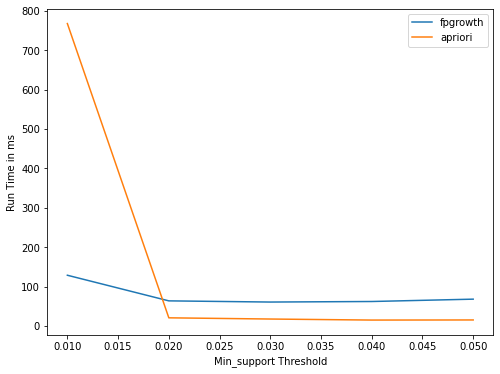

In [136]:
sns.lineplot(x=l,y=f,label="fpgrowth")
sns.lineplot(x=l,y=t,label="apriori")
plt.xlabel("Min_support Threshold")
plt.ylabel("Run Time in ms")

![gg.png](attachment:gg.png)